In [1]:
import yfinance as yf
from full_fred.fred import Fred
import os

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from statsmodels.tsa.ar_model import AutoReg


# Time Series Prep

In [2]:
SPTL = yf.download("SPTL",start='2014-01-01',end='2020-01-01')
display(SPTL)

os.environ['FRED_API_KEY'] = '8e4d8c1d9941be8f9ced393f0df6b3de'
fred = Fred()
fred.env_api_key_found()
EFFR = fred.get_series_df('EFFR',observation_start='2014-01-01',observation_end='2019-12-31')
EFFR = EFFR.rename(columns={'date':'Date','value':'EFFR'})
EFFR.index = pd.to_datetime(EFFR['Date'])
EFFR = EFFR.drop(columns=['realtime_start','realtime_end','Date'])
EFFR = EFFR.replace('.',np.nan)
EFFR = EFFR.dropna()
display(EFFR)

[*********************100%%**********************]  1 of 1 completed


Open       High        Low      Close  Adj Close   Volume
Date                                                                      
2014-01-02  29.924999  30.070000  29.924999  30.055000  23.225664    25400
2014-01-03  29.959999  30.105000  29.959999  30.035000  23.210218    22000
2014-01-06  30.110001  30.270000  30.110001  30.160000  23.306818     3200
2014-01-07  30.240000  30.260000  30.200001  30.260000  23.384087     3800
2014-01-08  30.075001  30.184999  30.075001  30.150000  23.299080    14800
...               ...        ...        ...        ...        ...      ...
2019-12-24  39.029999  39.330002  39.020000  39.290001  35.547798   164100
2019-12-26  39.320000  39.400002  39.200001  39.389999  35.638271   242300
2019-12-27  39.459999  39.509998  39.419998  39.419998  35.665413   155700
2019-12-30  39.040001  39.310001  38.959999  39.310001  35.565891   523900
2019-12-31  39.110001  39.180000  38.810001  38.869999  35.167793  2700300

[1510 rows x 6 columns]

EFFR
Date            
2014-01-02  0.08
2014-01-03  0.08
2014-01-06  0.08
2014-01-07  0.07
2014-01-08  0.07
...          ...
2019-12-24  1.55
2019-12-26  1.55
2019-12-27  1.55
2019-12-30  1.55
2019-12-31  1.55

[1507 rows x 1 columns]

In [3]:
All = pd.merge(SPTL,EFFR,on='Date')
display(All)

Open       High        Low      Close  Adj Close   Volume  \
Date                                                                         
2014-01-02  29.924999  30.070000  29.924999  30.055000  23.225664    25400   
2014-01-03  29.959999  30.105000  29.959999  30.035000  23.210218    22000   
2014-01-06  30.110001  30.270000  30.110001  30.160000  23.306818     3200   
2014-01-07  30.240000  30.260000  30.200001  30.260000  23.384087     3800   
2014-01-08  30.075001  30.184999  30.075001  30.150000  23.299080    14800   
...               ...        ...        ...        ...        ...      ...   
2019-12-24  39.029999  39.330002  39.020000  39.290001  35.547798   164100   
2019-12-26  39.320000  39.400002  39.200001  39.389999  35.638271   242300   
2019-12-27  39.459999  39.509998  39.419998  39.419998  35.665413   155700   
2019-12-30  39.040001  39.310001  38.959999  39.310001  35.565891   523900   
2019-12-31  39.110001  39.180000  38.810001  38.869999  35.167793  2700300   

            EFFR  
Date              
2014-01-02  0.08  
2014-01-03  0.08  
2014-01-06  0.08  
2014-01-07  0.07  
2014-01-08  0.07  
...          ...  
2019-12-24  1.55  
2019-12-26  1.55  
2019-12-27  1.55  
2019-12-30  1.55  
2019-12-31  1.55  

[1499 rows x 7 columns]

In [4]:
# Calculate the Daily EFFR
All['EFFR'] = pd.to_numeric(All['EFFR'],errors='coerce')
All['EFFR'] = All['EFFR']/100   # Calculate with percentage
All['EFFR Daily'] = All['EFFR']/252

In [5]:
# Calculate the return Of SPTL
All['SPTL Daily_Return'] = All['Close'].pct_change()
All['SPTL Excess_Return'] = All['SPTL Daily_Return']-All['EFFR Daily']


In [6]:
display(All)

Open       High        Low      Close  Adj Close   Volume  \
Date                                                                         
2014-01-02  29.924999  30.070000  29.924999  30.055000  23.225664    25400   
2014-01-03  29.959999  30.105000  29.959999  30.035000  23.210218    22000   
2014-01-06  30.110001  30.270000  30.110001  30.160000  23.306818     3200   
2014-01-07  30.240000  30.260000  30.200001  30.260000  23.384087     3800   
2014-01-08  30.075001  30.184999  30.075001  30.150000  23.299080    14800   
...               ...        ...        ...        ...        ...      ...   
2019-12-24  39.029999  39.330002  39.020000  39.290001  35.547798   164100   
2019-12-26  39.320000  39.400002  39.200001  39.389999  35.638271   242300   
2019-12-27  39.459999  39.509998  39.419998  39.419998  35.665413   155700   
2019-12-30  39.040001  39.310001  38.959999  39.310001  35.565891   523900   
2019-12-31  39.110001  39.180000  38.810001  38.869999  35.167793  2700300   

              EFFR  EFFR Daily  SPTL Daily_Return  SPTL Excess_Return  
Date                                                                   
2014-01-02  0.0008    0.000003                NaN                 NaN  
2014-01-03  0.0008    0.000003          -0.000665           -0.000669  
2014-01-06  0.0008    0.000003           0.004162            0.004159  
2014-01-07  0.0007    0.000003           0.003316            0.003313  
2014-01-08  0.0007    0.000003          -0.003635           -0.003638  
...            ...         ...                ...                 ...  
2019-12-24  0.0155    0.000062           0.003320            0.003258  
2019-12-26  0.0155    0.000062           0.002545            0.002484  
2019-12-27  0.0155    0.000062           0.000762            0.000700  
2019-12-30  0.0155    0.000062          -0.002790           -0.002852  
2019-12-31  0.0155    0.000062          -0.011193           -0.011255  

[1499 rows x 10 columns]

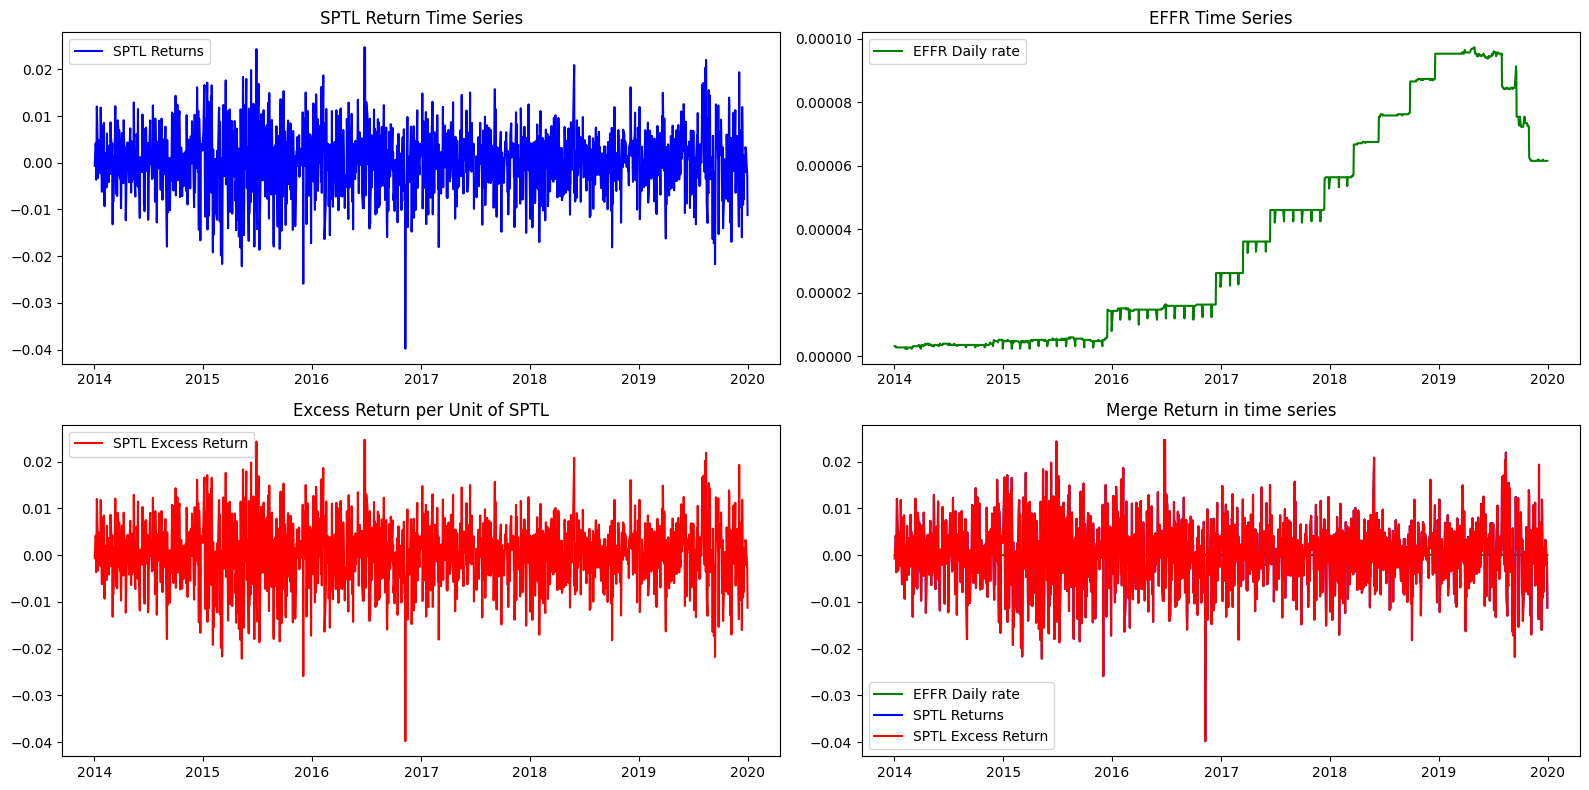

In [7]:
# Plot the return time series
plt.figure(figsize=(16, 8))

# Plot SPTL Return
plt.subplot(2, 2, 1)
plt.plot(All.index, All['SPTL Daily_Return'], label='SPTL Returns', color='blue')
plt.title('SPTL Return Time Series')
plt.legend()

# Plot EFFR Daily return
plt.subplot(2, 2, 2)
plt.plot(All.index, All['EFFR Daily'], label='EFFR Daily rate', color='green')
plt.title('EFFR Time Series')
plt.legend()


# Plot excess return per unit of SPTL
plt.subplot(2, 2, 3)
plt.plot(All.index, All['SPTL Excess_Return'], label='SPTL Excess Return', color='red')
plt.title('Excess Return per Unit of SPTL')
plt.legend()


# Plot return in time series
plt.subplot(2, 2, 4)
plt.plot(All.index, All['EFFR Daily'], label='EFFR Daily rate', color='green')
plt.plot(All.index, All['SPTL Daily_Return'], label='SPTL Returns', color='blue')
plt.plot(All.index, All['SPTL Excess_Return'], label='SPTL Excess Return', color='red')
plt.title('Merge Return in time series')
plt.legend()


# Adjust layout
plt.tight_layout()
plt.legend()

# Show plot
plt.show()

# 2. Trading Strategies


In [8]:
# 计算EMA8
#All['EMA'] = All['Close'].ewm(span=10, adjust=False).mean()
All['MA'] = All['Close'].rolling(window=10).mean()

display(All)

Open       High        Low      Close  Adj Close   Volume  \
Date                                                                         
2014-01-02  29.924999  30.070000  29.924999  30.055000  23.225664    25400   
2014-01-03  29.959999  30.105000  29.959999  30.035000  23.210218    22000   
2014-01-06  30.110001  30.270000  30.110001  30.160000  23.306818     3200   
2014-01-07  30.240000  30.260000  30.200001  30.260000  23.384087     3800   
2014-01-08  30.075001  30.184999  30.075001  30.150000  23.299080    14800   
...               ...        ...        ...        ...        ...      ...   
2019-12-24  39.029999  39.330002  39.020000  39.290001  35.547798   164100   
2019-12-26  39.320000  39.400002  39.200001  39.389999  35.638271   242300   
2019-12-27  39.459999  39.509998  39.419998  39.419998  35.665413   155700   
2019-12-30  39.040001  39.310001  38.959999  39.310001  35.565891   523900   
2019-12-31  39.110001  39.180000  38.810001  38.869999  35.167793  2700300   

              EFFR  EFFR Daily  SPTL Daily_Return  SPTL Excess_Return      MA  
Date                                                                           
2014-01-02  0.0008    0.000003                NaN                 NaN     NaN  
2014-01-03  0.0008    0.000003          -0.000665           -0.000669     NaN  
2014-01-06  0.0008    0.000003           0.004162            0.004159     NaN  
2014-01-07  0.0007    0.000003           0.003316            0.003313     NaN  
2014-01-08  0.0007    0.000003          -0.003635           -0.003638     NaN  
...            ...         ...                ...                 ...     ...  
2019-12-24  0.0155    0.000062           0.003320            0.003258  39.472  
2019-12-26  0.0155    0.000062           0.002545            0.002484  39.401  
2019-12-27  0.0155    0.000062           0.000762            0.000700  39.397  
2019-12-30  0.0155    0.000062          -0.002790           -0.002852  39.335  
2019-12-31  0.0155    0.000062          -0.011193           -0.011255  39.265  

[1499 rows x 11 columns]

In [9]:
# Prepare Initial data
Initial_capacity = 200000
Leverage = 10
loss_ratio = 0.95
profit_ratio = 1.5

In [10]:
# Prepare data
all_train_data = All.head(int(len(All)*(0.7)))
all_test_data = All.drop(all_train_data.index)
all_train_data.reset_index(inplace=True)
all_test_data.reset_index(inplace=True)

Tracking1Train = all_train_data.copy()
Tracking1Test = all_test_data.copy()
Tracking2Train = all_train_data.copy()
Tracking2Test = all_test_data.copy()
Tracking3Train = all_train_data.copy()
Tracking3Test = all_test_data.copy()


In [11]:
# clean the Leverage
def CleanLeverage(value):
    Cash = value - 1800000
    if Cash>0:
        return (Cash)
    else: return (-1000)

# Trend Following with long and short 


In [12]:
def TrendFollowing(dataframe,initial_capacity,Leverage,MAtimeWindow):
    # initial the parameters
    #dataframe['Cash'] = initial_capacity
    dataframe['LeverageCash'] = initial_capacity * Leverage
    dataframe['Action'] = 0
    dataframe['Quantity']= 0
    dataframe['StockValue'] = 0
    MASum = [0]
    BuyVolumeRatio = 1    
    
    for i, row in dataframe.iterrows():
        # Calculate the MA 
        MASum.append(MASum[i]+row['Close'])
        dataframe.loc[i,'MA'] = row['Close']
        if i >= MAtimeWindow:
            dataframe.loc[i,'MA'] = (MASum[i] - MASum[i - MAtimeWindow]) / MAtimeWindow
        
        # MA lower than the close price then buy the volume
        if dataframe.loc[i,'MA'] < dataframe.loc[i,'Close']:
            # tormorrow will buy the stock
            dataframe.loc[i+1,'Action'] = 1
            
            # Buy stock process
            if dataframe.loc[i,'Action'] == 1:
                dataframe.loc[i+1,'Action'] = 2
                # clear short
                dataframe.loc[i,'StockValue'] = -(dataframe.loc[i-1,'StockValue'] - dataframe.loc[i-1,'Quantity'] * dataframe.loc[i,'Close'])
                dataframe.loc[i,'LeverageCash'] = dataframe.loc[i-1,'LeverageCash'] + dataframe.loc[i,'StockValue']
                
                # buy stock
                dataframe.loc[i,'Quantity'] = dataframe.loc[i,'LeverageCash']//dataframe.loc[i,'Close']
                dataframe.loc[i,'StockValue'] = dataframe.loc[i,'Quantity'] * dataframe.loc[i,'Close']
                dataframe.loc[i,'LeverageCash'] = dataframe.loc[i,'LeverageCash'] - dataframe.loc[i,'StockValue']
                #dataframe.loc[i,'Cash'] = dataframe.loc[i-1,'Cash']
                   
            # Hold stock process           
            elif dataframe.loc[i,'Action'] == 2:
                dataframe.loc[i+1,'Action'] = 2
                dataframe.loc[i,'Quantity'] = dataframe.loc[i-1,'Quantity']
                dataframe.loc[i,'StockValue'] = dataframe.loc[i-1,'Quantity'] * dataframe.loc[i,'Close']
                dataframe.loc[i,'LeverageCash'] = dataframe.loc[i-1,'LeverageCash']
                #dataframe.loc[i,'Cash'] = dataframe.loc[i-1,'Cash']
                           
            # Sell stock, start holding cash
            elif dataframe.loc[i,'Action'] == -1:
                dataframe.loc[i+1,'Action'] = 1
                dataframe.loc[i,'LeverageCash'] = dataframe.loc[i-1,'Quantity'] * dataframe.loc[i,'Close'] + dataframe.loc[i-1,'LeverageCash']
                dataframe.loc[i,'Quantity'] = 0
                dataframe.loc[i,'StockValue'] = dataframe.loc[i,'Quantity'] * dataframe.loc[i,'Close']

                # Go short
                dataframe.loc[i,'Quantity'] = (-(dataframe.loc[i,'LeverageCash']//dataframe.loc[i,'Close']))
                dataframe.loc[i,'StockValue'] = dataframe.loc[i,'Quantity']*dataframe.loc[i,'Close']
                
            # Hold Cash 
            elif dataframe.loc[i,'Action'] == -2:
                dataframe.loc[i+1,'Action'] = 1
                dataframe.loc[i,'Quantity'] = dataframe.loc[i-1,'Quantity']
                dataframe.loc[i,'StockValue'] = dataframe.loc[i-1,'StockValue']
                dataframe.loc[i,'LeverageCash'] = dataframe.loc[i-1,'LeverageCash']
                         
                #dataframe.loc[i,'Cash'] = dataframe.loc[i-1,'Cash']

            # otherwise keep the current cash
            else:
                dataframe.loc[i,'Quantity'] = dataframe.loc[i-1,'Quantity']
                dataframe.loc[i,'StockValue'] = dataframe.loc[i-1,'StockValue']
                dataframe.loc[i,'LeverageCash'] = dataframe.loc[i-1,'LeverageCash']
    
   
        # MA higher than the close price then Sell the volume
        if dataframe.loc[i,'MA'] > dataframe.loc[i,'Close']:
            # tormorrow will sell the stock
            dataframe.loc[i+1,'Action'] = -1
            # Sell the stock, Hold the Cash
            if dataframe.loc[i,'Action'] == -1:
                dataframe.loc[i+1,'Action'] = -2
                dataframe.loc[i,'LeverageCash'] = dataframe.loc[i-1,'Quantity'] * dataframe.loc[i,'Close'] + dataframe.loc[i-1,'LeverageCash']
                dataframe.loc[i,'Quantity'] = 0
                dataframe.loc[i,'StockValue'] = dataframe.loc[i,'Quantity'] * dataframe.loc[i,'Close']

                # Go short
                dataframe.loc[i,'Quantity'] = (-(dataframe.loc[i,'LeverageCash']//dataframe.loc[i,'Close']))
                dataframe.loc[i,'StockValue'] = dataframe.loc[i,'Quantity']*dataframe.loc[i,'Close']
                
            # Hold Cash
            elif dataframe.loc[i,'Action'] == -2:
                dataframe.loc[i+1,'Action'] = -2
                dataframe.loc[i,'Quantity'] = dataframe.loc[i-1,'Quantity']
                dataframe.loc[i,'StockValue'] = dataframe.loc[i-1,'StockValue']
                dataframe.loc[i,'LeverageCash'] = dataframe.loc[i-1,'LeverageCash']  
                #dataframe.loc[i,'Cash'] = dataframe.loc[i-1,'Cash']
                       
            # Buy stock 
            elif dataframe.loc[i,'Action'] == 1:
                dataframe.loc[i+1,'Action'] = -1
                
                # clear short
                dataframe.loc[i,'StockValue'] = -(dataframe.loc[i-1,'StockValue'] - dataframe.loc[i-1,'Quantity'] * dataframe.loc[i,'Close'])
                dataframe.loc[i,'LeverageCash'] = dataframe.loc[i-1,'LeverageCash']+dataframe.loc[i,'StockValue'] 

                # buy stock
                dataframe.loc[i,'Quantity'] = dataframe.loc[i,'LeverageCash']//dataframe.loc[i,'Close']
                dataframe.loc[i,'StockValue'] = dataframe.loc[i,'Quantity'] * dataframe.loc[i,'Close']
                dataframe.loc[i,'LeverageCash'] = dataframe.loc[i,'LeverageCash']-dataframe.loc[i,'StockValue']
                
            # Hold stock            
            elif dataframe.loc[i,'Action'] == 2:
                dataframe.loc[i+1,'Action'] = -1
                dataframe.loc[i,'Quantity'] = dataframe.loc[i-1,'Quantity']
                dataframe.loc[i,'StockValue'] = dataframe.loc[i-1,'Quantity'] * dataframe.loc[i,'Close']
                dataframe.loc[i,'LeverageCash'] = dataframe.loc[i-1,'LeverageCash']
                #dataframe.loc[i,'Cash'] = dataframe.loc[i-1,'Cash']
                
                
            # otherwise keeping current value
            else:
                dataframe.loc[i,'Quantity'] = dataframe.loc[i-1,'Quantity']
                dataframe.loc[i,'StockValue'] = dataframe.loc[i-1,'StockValue']
                dataframe.loc[i,'LeverageCash'] = dataframe.loc[i-1,'LeverageCash']
                #dataframe.loc[i,'Cash'] = dataframe.loc[i-1,'Cash']

        # MA Same as the close price then keep the volume
        if dataframe.loc[i,'MA'] == dataframe.loc[i,'Close']:
            dataframe.loc[i+1,'Action'] = 0
            dataframe.loc[i,'LeverageCash'] = initial_capacity * Leverage
            dataframe.loc[i,'Quantity']= 0
            dataframe.loc[i,'StockValue'] = dataframe.loc[i,'Quantity'] * dataframe.loc[i,'Close']

        if dataframe.loc[i,'StockValue']>0:
            dataframe.loc[i,'TotalValue(Leverage)'] = dataframe.loc[i,'StockValue'] + dataframe.loc[i,'LeverageCash']
        elif dataframe.loc[i,'StockValue']<0:
            dataframe.loc[i,'TotalValue(Leverage)'] = dataframe.loc[i-1,'TotalValue(Leverage)']
        else: dataframe.loc[i,'TotalValue(Leverage)'] = dataframe.loc[i,'StockValue'] + dataframe.loc[i,'LeverageCash']

    dataframe.drop(index=dataframe.index[-1],axis=0,inplace=True)
    return dataframe


# Mean Reversion Long and short

In [13]:
def MeanReversion(dataframe,initial_capacity,Leverage,MAtimeWindow):
    # initial the parameters
    #dataframe['Cash'] = initial_capacity
    dataframe['LeverageCash'] = initial_capacity * Leverage
    dataframe['Action'] = 0
    dataframe['Quantity']= 0
    dataframe['StockValue'] = 0

    MASum = [0]
    BuyVolumeRatio = 1    
    
    for i, row in dataframe.iterrows():
        # Calculate the MA 
        MASum.append(MASum[i]+row['Close'])
        dataframe.loc[i,'MA'] = row['Close']
        if i >= MAtimeWindow:
            dataframe.loc[i,'MA'] = (MASum[i] - MASum[i - MAtimeWindow]) / MAtimeWindow
        
        # MA large than the close price then buy the volume
        if dataframe.loc[i,'MA'] > dataframe.loc[i,'Close']:
            # tormorrow will buy the stock
            dataframe.loc[i+1,'Action'] = 1
            
            # Buy stock process
            if dataframe.loc[i,'Action'] == 1:
                dataframe.loc[i+1,'Action'] = 2
                # clear short
                dataframe.loc[i,'StockValue'] = -(dataframe.loc[i-1,'StockValue'] - dataframe.loc[i-1,'Quantity'] * dataframe.loc[i,'Close'])
                dataframe.loc[i,'LeverageCash'] = dataframe.loc[i-1,'LeverageCash'] + dataframe.loc[i,'StockValue']
                
                # buy stock
                dataframe.loc[i,'Quantity'] = dataframe.loc[i,'LeverageCash']//dataframe.loc[i,'Close']
                dataframe.loc[i,'StockValue'] = dataframe.loc[i,'Quantity'] * dataframe.loc[i,'Close']
                dataframe.loc[i,'LeverageCash'] = dataframe.loc[i,'LeverageCash'] - dataframe.loc[i,'StockValue']
                #dataframe.loc[i,'Cash'] = dataframe.loc[i-1,'Cash']
                
            # Hold stock process           
            elif dataframe.loc[i,'Action'] == 2:
                dataframe.loc[i+1,'Action'] = 2
                dataframe.loc[i,'Quantity'] = dataframe.loc[i-1,'Quantity']
                dataframe.loc[i,'StockValue'] = dataframe.loc[i-1,'Quantity'] * dataframe.loc[i,'Close']
                dataframe.loc[i,'LeverageCash'] = dataframe.loc[i-1,'LeverageCash']
                #dataframe.loc[i,'Cash'] = dataframe.loc[i-1,'Cash']
                
                
            # Sell stock, start holding cash
            elif dataframe.loc[i,'Action'] == -1:
                dataframe.loc[i+1,'Action'] = 1
                dataframe.loc[i,'LeverageCash'] = dataframe.loc[i-1,'Quantity'] * dataframe.loc[i,'Close'] + dataframe.loc[i-1,'LeverageCash']
                dataframe.loc[i,'Quantity'] = 0
                dataframe.loc[i,'StockValue'] = dataframe.loc[i,'Quantity'] * dataframe.loc[i,'Close']

                # Go short
                dataframe.loc[i,'Quantity'] = (-(dataframe.loc[i,'LeverageCash']//dataframe.loc[i,'Close']))
                dataframe.loc[i,'StockValue'] = dataframe.loc[i,'Quantity']*dataframe.loc[i,'Close']
                
                
            # Hold Cash 
            elif dataframe.loc[i,'Action'] == -2:
                dataframe.loc[i+1,'Action'] = 1
                dataframe.loc[i,'Quantity'] = dataframe.loc[i-1,'Quantity']
                dataframe.loc[i,'StockValue'] = dataframe.loc[i-1,'StockValue']
                dataframe.loc[i,'LeverageCash'] = dataframe.loc[i-1,'LeverageCash']
                         
                #dataframe.loc[i,'Cash'] = dataframe.loc[i-1,'Cash']

            # otherwise keep the current cash
            else:
                dataframe.loc[i,'Quantity'] = dataframe.loc[i-1,'Quantity']
                dataframe.loc[i,'StockValue'] = dataframe.loc[i-1,'StockValue']
                dataframe.loc[i,'LeverageCash'] = dataframe.loc[i-1,'LeverageCash']
    
                
        # MA lower than the close price then Sell the volume
        if dataframe.loc[i,'MA'] < dataframe.loc[i,'Close']:
            # tormorrow will sell the stock
            dataframe.loc[i+1,'Action'] = -1
            # Sell the stock, Hold the Cash
            if dataframe.loc[i,'Action'] == -1:
                dataframe.loc[i+1,'Action'] = -2
                dataframe.loc[i,'LeverageCash'] = dataframe.loc[i-1,'Quantity'] * dataframe.loc[i,'Close'] + dataframe.loc[i-1,'LeverageCash']
                dataframe.loc[i,'Quantity'] = 0
                dataframe.loc[i,'StockValue'] = dataframe.loc[i,'Quantity'] * dataframe.loc[i,'Close']

                
                # Go short
                dataframe.loc[i,'Quantity'] = (-(dataframe.loc[i,'LeverageCash']//dataframe.loc[i,'Close']))
                dataframe.loc[i,'StockValue'] = dataframe.loc[i,'Quantity']*dataframe.loc[i,'Close']
                
            # Hold Cash
            elif dataframe.loc[i,'Action'] == -2:
                dataframe.loc[i+1,'Action'] = -2
                dataframe.loc[i,'Quantity'] = dataframe.loc[i-1,'Quantity']
                dataframe.loc[i,'StockValue'] = dataframe.loc[i-1,'StockValue']
                dataframe.loc[i,'LeverageCash'] = dataframe.loc[i-1,'LeverageCash']  
                #dataframe.loc[i,'Cash'] = dataframe.loc[i-1,'Cash']
                
                
                
            # Buy stock 
            elif dataframe.loc[i,'Action'] == 1:
                dataframe.loc[i+1,'Action'] = -1
                
                # clear short
                dataframe.loc[i,'StockValue'] = -(dataframe.loc[i-1,'StockValue'] - dataframe.loc[i-1,'Quantity'] * dataframe.loc[i,'Close'])
                dataframe.loc[i,'LeverageCash'] = dataframe.loc[i-1,'LeverageCash']+dataframe.loc[i,'StockValue'] 


                # buy stock
                dataframe.loc[i,'Quantity'] = dataframe.loc[i,'LeverageCash']//dataframe.loc[i,'Close']
                dataframe.loc[i,'StockValue'] = dataframe.loc[i,'Quantity'] * dataframe.loc[i,'Close']
                dataframe.loc[i,'LeverageCash'] = dataframe.loc[i,'LeverageCash']-dataframe.loc[i,'StockValue']
                #dataframe.loc[i,'Cash'] = dataframe.loc[i-1,'Cash']
                
            # Hold stock            
            elif dataframe.loc[i,'Action'] == 2:
                dataframe.loc[i+1,'Action'] = -1
                dataframe.loc[i,'Quantity'] = dataframe.loc[i-1,'Quantity']
                dataframe.loc[i,'StockValue'] = dataframe.loc[i-1,'Quantity'] * dataframe.loc[i,'Close']
                dataframe.loc[i,'LeverageCash'] = dataframe.loc[i-1,'LeverageCash']
                #dataframe.loc[i,'Cash'] = dataframe.loc[i-1,'Cash']
                
                
            # otherwise keeping current value
            else:
                dataframe.loc[i,'Quantity'] = dataframe.loc[i-1,'Quantity']
                dataframe.loc[i,'StockValue'] = dataframe.loc[i-1,'StockValue']
                dataframe.loc[i,'LeverageCash'] = dataframe.loc[i-1,'LeverageCash']
                #dataframe.loc[i,'Cash'] = dataframe.loc[i-1,'Cash']


        # MA Same as the close price then keep the volume
        if dataframe.loc[i,'MA'] == dataframe.loc[i,'Close']:
            dataframe.loc[i+1,'Action'] = 0
            #dataframe.loc[i,'Cash'] = initial_capacity
            dataframe.loc[i,'LeverageCash'] = initial_capacity * Leverage
            dataframe.loc[i,'Quantity']= 0
            dataframe.loc[i,'StockValue'] = dataframe.loc[i,'Quantity'] * dataframe.loc[i,'Close']

        if dataframe.loc[i,'StockValue']>0:
            dataframe.loc[i,'TotalValue(Leverage)'] = dataframe.loc[i,'StockValue'] + dataframe.loc[i,'LeverageCash']
        elif dataframe.loc[i,'StockValue']<0:
            dataframe.loc[i,'TotalValue(Leverage)'] = dataframe.loc[i-1,'TotalValue(Leverage)']
        else: dataframe.loc[i,'TotalValue(Leverage)'] = dataframe.loc[i,'StockValue'] + dataframe.loc[i,'LeverageCash']

    dataframe.drop(index=dataframe.index[-1],axis=0,inplace=True)
    return dataframe


# AR model + Trend Following

In [14]:
def ARModel(dataframe,initial_capacity,Leverage,MAtimeWindow):
    # initial the parameters
    #dataframe['Cash'] = initial_capacity
    dataframe['LeverageCash'] = initial_capacity * Leverage
    dataframe['Action'] = 0
    dataframe['Quantity']= 0
    dataframe['StockValue'] = dataframe['Quantity']*dataframe['Close']
    MASum = [0]
    BuyVolumeRatio = 1
    
    for i, row in dataframe.iterrows():
        # Calculate the MA 
        #MASum.append(MASum[i]+row['Close'])
        dataframe.loc[i,'AR_predict'] = row['Close']        
        # Calculate the MA 
        #dataframe.loc[i,'MA'] = row['Close']
    
        if i >= MAtimeWindow:
            #dataframe.loc[i,'MA'] = (MASum[i] - MASum[i - MAtimeWindow]) / MAtimeWindow
            # Run AR model 
            train = dataframe['Close'][i-MAtimeWindow:i]
            model_fit = AutoReg(train,lags=(1,4)).fit()
            prediction = model_fit.predict(start = len(train),end = len(train),dynamic = False)
            dataframe.loc[dataframe.index[i], 'AR_predict'] = prediction.iloc[0]
            
        # predict lower than the close price then buy the volume
        if dataframe.loc[i,'AR_predict'] < dataframe.loc[i,'Close']:
            # tormorrow will buy the stock
            dataframe.loc[i+1,'Action'] = 1
            
            # Buy stock process
            if dataframe.loc[i,'Action'] == 1:
                dataframe.loc[i+1,'Action'] = 2
                # clear short
                dataframe.loc[i,'StockValue'] = -(dataframe.loc[i-1,'StockValue'] - dataframe.loc[i-1,'Quantity'] * dataframe.loc[i,'Close'])
                dataframe.loc[i,'LeverageCash'] = dataframe.loc[i-1,'LeverageCash'] + dataframe.loc[i,'StockValue']
                
                # buy stock
                dataframe.loc[i,'Quantity'] = dataframe.loc[i,'LeverageCash']//dataframe.loc[i,'Close']
                dataframe.loc[i,'StockValue'] = dataframe.loc[i,'Quantity'] * dataframe.loc[i,'Close']
                dataframe.loc[i,'LeverageCash'] = dataframe.loc[i,'LeverageCash'] - dataframe.loc[i,'StockValue']
                #dataframe.loc[i,'Cash'] = dataframe.loc[i-1,'Cash']
                
   
            # Hold stock process           
            elif dataframe.loc[i,'Action'] == 2:
                dataframe.loc[i+1,'Action'] = 2
                dataframe.loc[i,'Quantity'] = dataframe.loc[i-1,'Quantity']
                dataframe.loc[i,'StockValue'] = dataframe.loc[i-1,'Quantity'] * dataframe.loc[i,'Close']
                dataframe.loc[i,'LeverageCash'] = dataframe.loc[i-1,'LeverageCash']
                #dataframe.loc[i,'Cash'] = dataframe.loc[i-1,'Cash']
                
                
            # Sell stock, start holding cash
            elif dataframe.loc[i,'Action'] == -1:
                dataframe.loc[i+1,'Action'] = 1
                dataframe.loc[i,'LeverageCash'] = dataframe.loc[i-1,'Quantity'] * dataframe.loc[i,'Close'] + dataframe.loc[i-1,'LeverageCash']
                dataframe.loc[i,'Quantity'] = 0
                dataframe.loc[i,'StockValue'] = dataframe.loc[i,'Quantity'] * dataframe.loc[i,'Close']

                # Go short
                dataframe.loc[i,'Quantity'] = (-(dataframe.loc[i,'LeverageCash']//dataframe.loc[i,'Close']))
                dataframe.loc[i,'StockValue'] = dataframe.loc[i,'Quantity']*dataframe.loc[i,'Close']
                
                
            # Hold Cash 
            elif dataframe.loc[i,'Action'] == -2:
                dataframe.loc[i+1,'Action'] = 1
                dataframe.loc[i,'Quantity'] = dataframe.loc[i-1,'Quantity']
                dataframe.loc[i,'StockValue'] = dataframe.loc[i-1,'StockValue']
                dataframe.loc[i,'LeverageCash'] = dataframe.loc[i-1,'LeverageCash']
                         
                #dataframe.loc[i,'Cash'] = dataframe.loc[i-1,'Cash']

            # otherwise keep the current cash
            else:
                dataframe.loc[i,'Quantity'] = dataframe.loc[i-1,'Quantity']
                dataframe.loc[i,'StockValue'] = dataframe.loc[i-1,'StockValue']
                dataframe.loc[i,'LeverageCash'] = dataframe.loc[i-1,'LeverageCash']
    
                
        # predict higher than the close price then Sell the volume
        if dataframe.loc[i,'AR_predict'] > dataframe.loc[i,'Close']:
            # tormorrow will sell the stock
            dataframe.loc[i+1,'Action'] = -1
            # Sell the stock, Hold the Cash
            if dataframe.loc[i,'Action'] == -1:
                dataframe.loc[i+1,'Action'] = -2
                dataframe.loc[i,'LeverageCash'] = dataframe.loc[i-1,'Quantity'] * dataframe.loc[i,'Close'] + dataframe.loc[i-1,'LeverageCash']
                dataframe.loc[i,'Quantity'] = 0
                dataframe.loc[i,'StockValue'] = dataframe.loc[i,'Quantity'] * dataframe.loc[i,'Close']

                
                # Go short
                dataframe.loc[i,'Quantity'] = (-(dataframe.loc[i,'LeverageCash']//dataframe.loc[i,'Close']))
                dataframe.loc[i,'StockValue'] = dataframe.loc[i,'Quantity']*dataframe.loc[i,'Close']
                
            # Hold Cash
            elif dataframe.loc[i,'Action'] == -2:
                dataframe.loc[i+1,'Action'] = -2
                dataframe.loc[i,'Quantity'] = dataframe.loc[i-1,'Quantity']
                dataframe.loc[i,'StockValue'] = dataframe.loc[i-1,'StockValue']
                dataframe.loc[i,'LeverageCash'] = dataframe.loc[i-1,'LeverageCash']  
                #dataframe.loc[i,'Cash'] = dataframe.loc[i-1,'Cash']
                
                
                
            # Buy stock 
            elif dataframe.loc[i,'Action'] == 1:
                dataframe.loc[i+1,'Action'] = -1
                
                # clear short
                dataframe.loc[i,'StockValue'] = -(dataframe.loc[i-1,'StockValue'] - dataframe.loc[i-1,'Quantity'] * dataframe.loc[i,'Close'])
                dataframe.loc[i,'LeverageCash'] = dataframe.loc[i-1,'LeverageCash']+dataframe.loc[i,'StockValue'] 


                # buy stock
                dataframe.loc[i,'Quantity'] = dataframe.loc[i,'LeverageCash']//dataframe.loc[i,'Close']
                dataframe.loc[i,'StockValue'] = dataframe.loc[i,'Quantity'] * dataframe.loc[i,'Close']
                dataframe.loc[i,'LeverageCash'] = dataframe.loc[i,'LeverageCash']-dataframe.loc[i,'StockValue']
                #dataframe.loc[i,'Cash'] = dataframe.loc[i-1,'Cash']
                
            # Hold stock            
            elif dataframe.loc[i,'Action'] == 2:
                dataframe.loc[i+1,'Action'] = -1
                dataframe.loc[i,'Quantity'] = dataframe.loc[i-1,'Quantity']
                dataframe.loc[i,'StockValue'] = dataframe.loc[i-1,'Quantity'] * dataframe.loc[i,'Close']
                dataframe.loc[i,'LeverageCash'] = dataframe.loc[i-1,'LeverageCash']
                #dataframe.loc[i,'Cash'] = dataframe.loc[i-1,'Cash']
                
                
            # otherwise keeping current value
            else:
                dataframe.loc[i,'Quantity'] = dataframe.loc[i-1,'Quantity']
                dataframe.loc[i,'StockValue'] = dataframe.loc[i-1,'StockValue']
                dataframe.loc[i,'LeverageCash'] = dataframe.loc[i-1,'LeverageCash']
                #dataframe.loc[i,'Cash'] = dataframe.loc[i-1,'Cash']


        # predict Same as the close price then keep the volume
        if dataframe.loc[i,'AR_predict'] == dataframe.loc[i,'Close']:
            dataframe.loc[i+1,'Action'] = 0
            #dataframe.loc[i,'Cash'] = initial_capacity
            dataframe.loc[i,'LeverageCash'] = initial_capacity * Leverage
            dataframe.loc[i,'Quantity']= 0
            dataframe.loc[i,'StockValue'] = dataframe.loc[i,'Quantity'] * dataframe.loc[i,'Close']

        if dataframe.loc[i,'StockValue']>0:
            dataframe.loc[i,'TotalValue(Leverage)'] = dataframe.loc[i,'StockValue'] + dataframe.loc[i,'LeverageCash']
        elif dataframe.loc[i,'StockValue']<0:
            dataframe.loc[i,'TotalValue(Leverage)'] = dataframe.loc[i-1,'TotalValue(Leverage)']
        else: dataframe.loc[i,'TotalValue(Leverage)'] = dataframe.loc[i,'StockValue'] + dataframe.loc[i,'LeverageCash']

    dataframe.drop(index=dataframe.index[-1],axis=0,inplace=True)

    return dataframe


# Calcualtion   

In [15]:
# Calculate PnL 
def PnL(dataframe):
    dataframe['PnL'] = dataframe['SPTL Excess_Return'] * dataframe['StockValue']

# Caculate TurnOver_dollars
def Turnover_dollars(dataframe):
    dataframe['Turnover_dollars_Daily'] = ((dataframe['Quantity'].diff().abs()) * dataframe['Close'])
    dataframe['Turnover_dollars_Cumsum'] = ((dataframe['Quantity'].diff().abs()) * dataframe['Close']).cumsum()
    #dataframe['Turnover_dollars_CumsumMA'] = dataframe['Turnover_dollars_Cumsum'].rolling(window=20).mean()
    
# Calcualte the turnover units    
def Turnover_units(dataframe):
    dataframe['Turnover_units_Daily'] = (((dataframe['Quantity']*dataframe['Close'])/dataframe['Close'] - dataframe['Quantity'].shift(-1)*dataframe['Close'].shift(-1) / dataframe['Close'].shift(-1))).abs()
    dataframe['Turnover_units_Cumsum'] = (((dataframe['Quantity']*dataframe['Close'])/dataframe['Close'] - dataframe['Quantity'].shift(-1)*dataframe['Close'].shift(-1) / dataframe['Close'].shift(-1))).abs().cumsum()
    dataframe['Turnover_units'] = dataframe['Quantity'].diff().abs()
    #dataframe['Turnover_units_CumsumMA'] = dataframe['Turnover_units_Cumsum'].rolling(window=20).mean()

# Calculate the change in the growth of the money-market capital account
def deltaValue(dataframe):
    dataframe['deltaCaptial'] = (dataframe['TotalValue(Leverage)'] - dataframe['Quantity']*dataframe['Close'].abs()/Leverage ) * dataframe['EFFR Daily']
    dataframe['deltaTotal'] = dataframe['PnL']+dataframe['deltaCaptial']
    dataframe['deltaPnLCum'] = dataframe['PnL'].cumsum()
    dataframe['deltaTotalCum'] = dataframe['deltaTotal'].cumsum()
    dataframe['deltaCaptialCum'] = dataframe['deltaCaptial'].cumsum()


# Plot Graph

In [16]:
def plotStrategies(dataframe):
    plt.figure(figsize=(20,10))
    plt.plot(dataframe['StockValue'],label='Strategy θt')
    plt.plot(dataframe['TotalValue(Leverage)'],label='Upper Bound Total')
    plt.plot(-dataframe['TotalValue(Leverage)'],label='Lower Bound Total')
    plt.axhline(y=2000000,color='red',linestyle='--')
    plt.title('Position of the strategy')
    plt.legend()
    plt.show()

In [17]:
def plot_trading_signal(df,LineName:str):
    # 绘制交易图表
    #买入开仓
    long_entry = df.loc[df['Action']==1]['Close']
    #卖出平仓
    Empty = df.loc[df['Action']==0]['Close']
    #卖出开仓
    short_entry = df.loc[df['Action']==-1]['Close']

    fig, ax = plt.subplots(1, figsize=(20, 10), sharex=True)   
    ax.plot(df['Close'],label = 'STPL')
    ax.plot(df[LineName], label=LineName)
    
    ax.scatter(long_entry.index, long_entry, color='r', 
               s=100, marker='^', label='Long Entry (Clean Short)',
               zorder=10)
    ax.scatter(Empty.index, Empty, color='r',
               s=100, marker='x', label='Empty',
               zorder=10)
    ax.scatter(short_entry.index, short_entry, color='b', 
               s=100, marker='^', label='Short Entry (Clean Long)',
               zorder=10)

    ax.set_title('Strategy Signals')
    ax.legend()
    plt.show()


In [18]:
def plotDetlaValue(dataframe):
    plt.figure(figsize=(20,10))
    plt.plot(dataframe['deltaTotal'],label='delta Total')
    plt.plot(dataframe['PnL'],label='PnL')
    plt.plot(dataframe['deltaCaptial'],label='delta Captial')
    plt.plot(dataframe['deltaTotal'].cumsum(),label='delta Total Cumulative',linestyle='--')
    plt.plot(dataframe['PnL'].cumsum(),label='PnL Cumulative',linestyle='--')
    plt.plot(dataframe['deltaCaptial'].cumsum(),label='delta Captial Cumulative',linestyle='--')
    plt.title('∆V, Captial ∆V, and Total ∆V for strategy')
    plt.legend()
    plt.show()

In [19]:
def plotMATurnOver1(dataframe,MAWindow):
    plt.figure(figsize=(20,10))
    #plt.plot(dataframe['Turnover_dollars_Daily'],label='Turnover_dollars_Daily')    
    plt.plot(dataframe['Turnover_dollars_Daily'].rolling(window=MAWindow).mean(),label='Turnover_dollars_Daily MA',linestyle='--')    
    #plt.plot(dataframe['Turnover_units_Daily'],label='Turnover_dollars_Daily')    
    #plt.plot(dataframe['Turnover_units_Daily'].rolling(window=MAWindow).mean(),label='Turnover_units_Daily MA',linestyle='--')
    plt.plot(dataframe['Volume'],label='Volume')
    #plt.plot(dataframe['Turnover_units_Cumsum'],label='Turnover_units_Cumsum')    
    #plt.plot(dataframe['Turnover_dollars_Cumsum'],label='Turnover_dollars_Cumsum')    
    plt.plot(dataframe['Turnover_units_Cumsum'].rolling(window=MAWindow).mean(),label='Turnover_units_Cumsum MA',linestyle='--')
    #plt.plot(dataframe['Turnover_dollars_Cumsum'].rolling(window=MAWindow).mean(),label='Turnover_dollars_Cumsum MA',linestyle='--')
    plt.title('The Moving Average of turnover dollars and units')
    plt.legend()
    plt.show()

In [20]:
def plotMATurnOver(dataframe,MAWindow):

    fig, ax1 = plt.subplots(figsize=(14, 7))

    color = 'tab:blue'
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Turnover Moving Average', color=color)
    ax1.plot(dataframe['Date'], dataframe['Turnover_units_Daily'].rolling(window=MAWindow).mean(), color=color, label='Turnover units MA')
    ax1.tick_params(axis='y', labelcolor=color)

    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
    color = 'tab:red'
    ax2.set_ylabel(f'Volatility Moving Average', color=color)  # we already handled the x-label with ax1
    ax2.plot(dataframe['Date'], dataframe['SPTL Daily_Return'].rolling(window=MAWindow).std(), color=color, label='Volatility of SPTL')
    ax2.tick_params(axis='y', labelcolor=color)


    fig.tight_layout()  # to make sure layout doesn't overlap
    plt.title('Moving Average of Turnover and Volatility Over Time')
    plt.show()

# Implement the strategy

Strategy 1: trend followings

/var/folders/0d/9f2qx66n7qbb98mtm5mxzlyr0000gn/T/ipykernel_26847/3280999952.py:32: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '1999989.0493011475' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  dataframe.loc[i,'StockValue'] = dataframe.loc[i,'Quantity'] * dataframe.loc[i,'Close']
/var/folders/0d/9f2qx66n7qbb98mtm5mxzlyr0000gn/T/ipykernel_26847/3280999952.py:33: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '10.950698852539062' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  dataframe.loc[i,'LeverageCash'] = dataframe.loc[i,'LeverageCash'] - dataframe.loc[i,'StockValue']


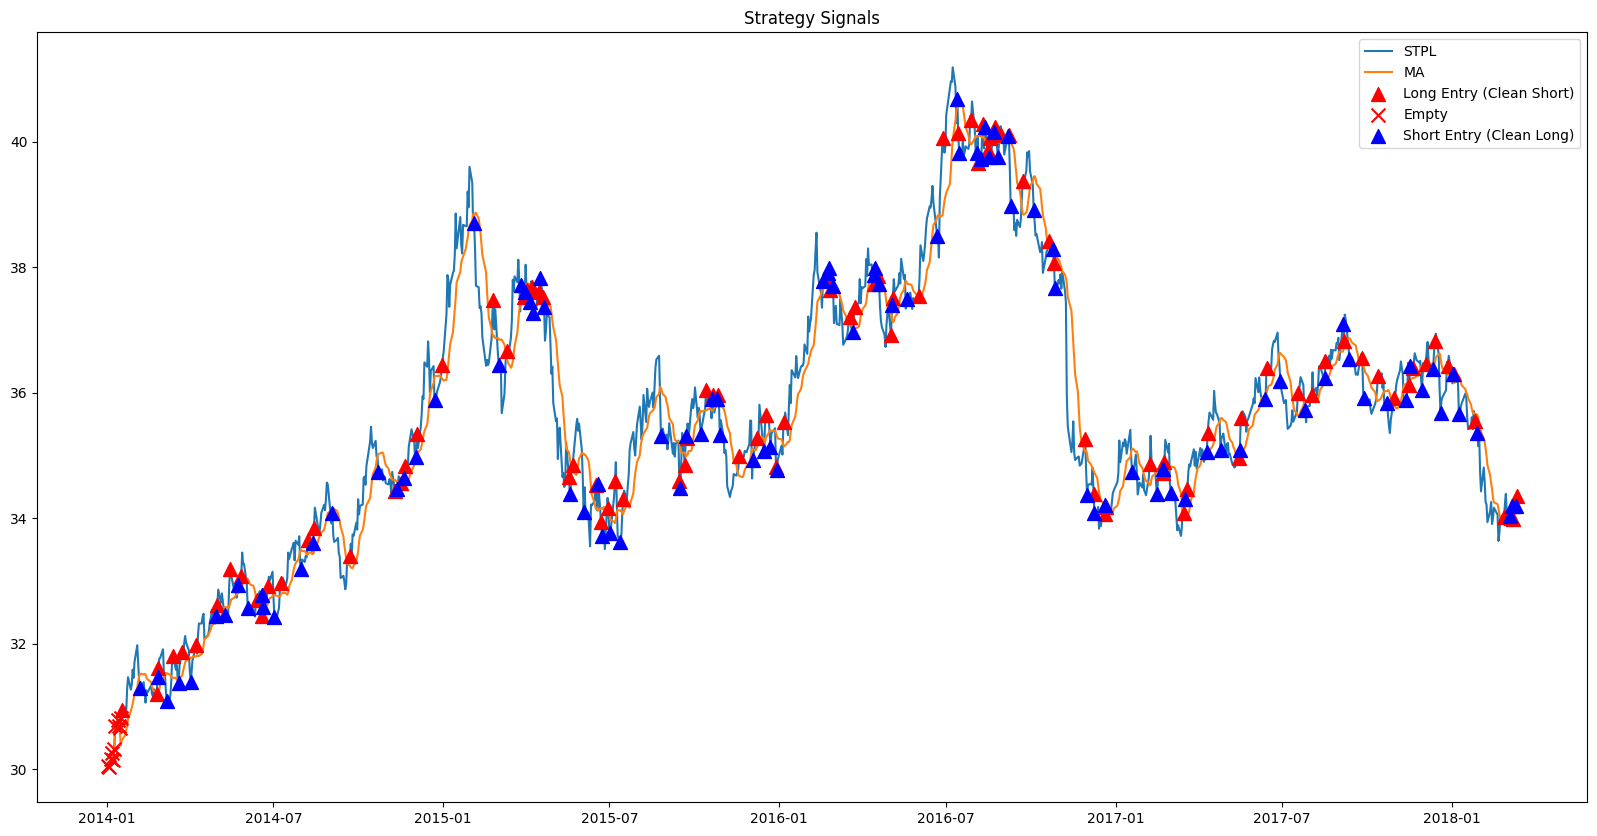

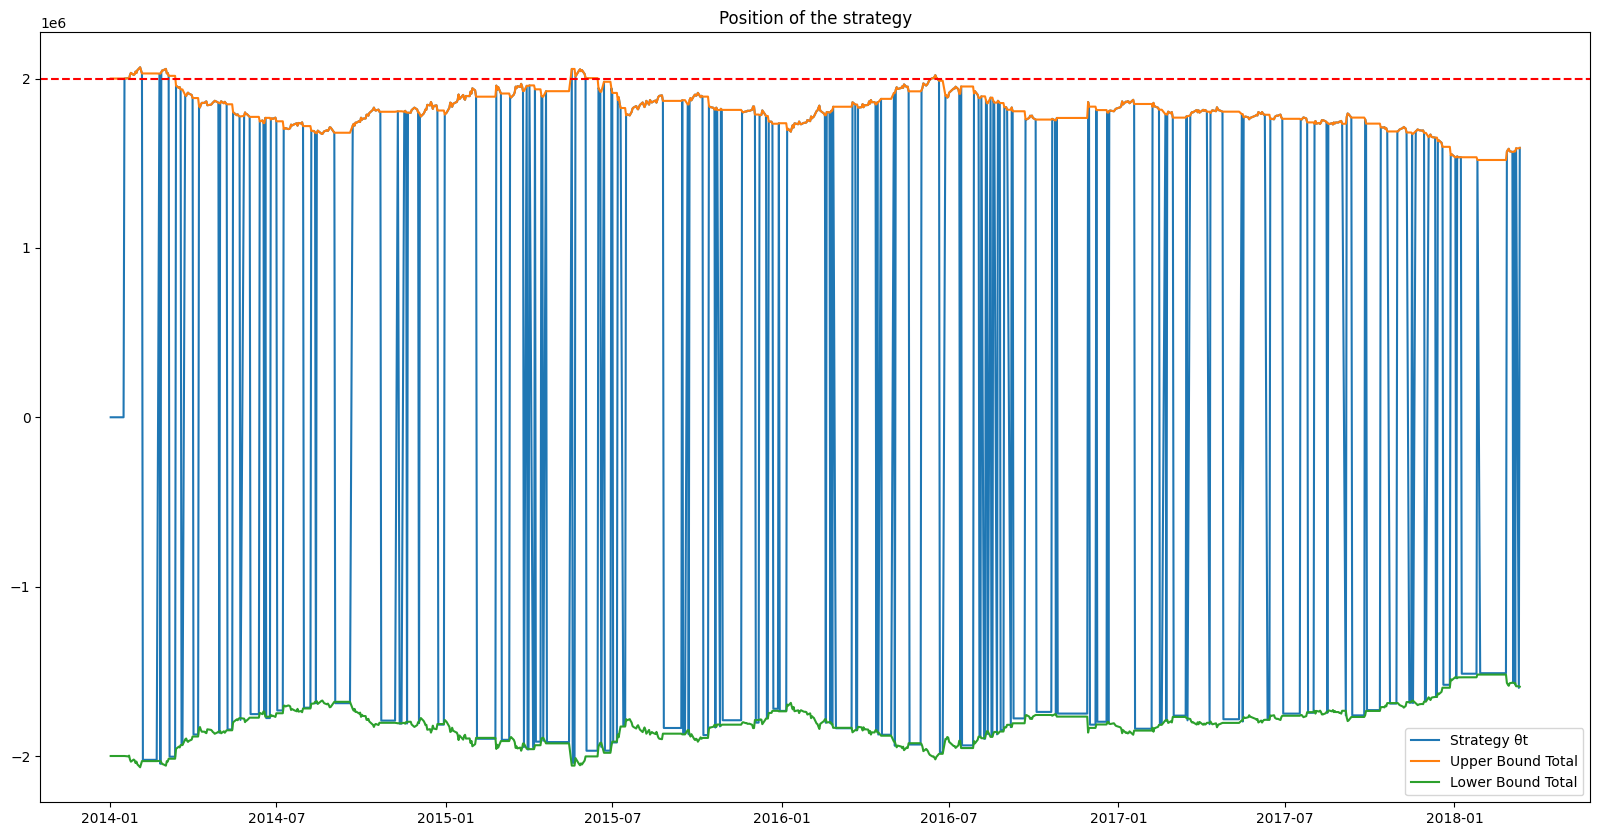

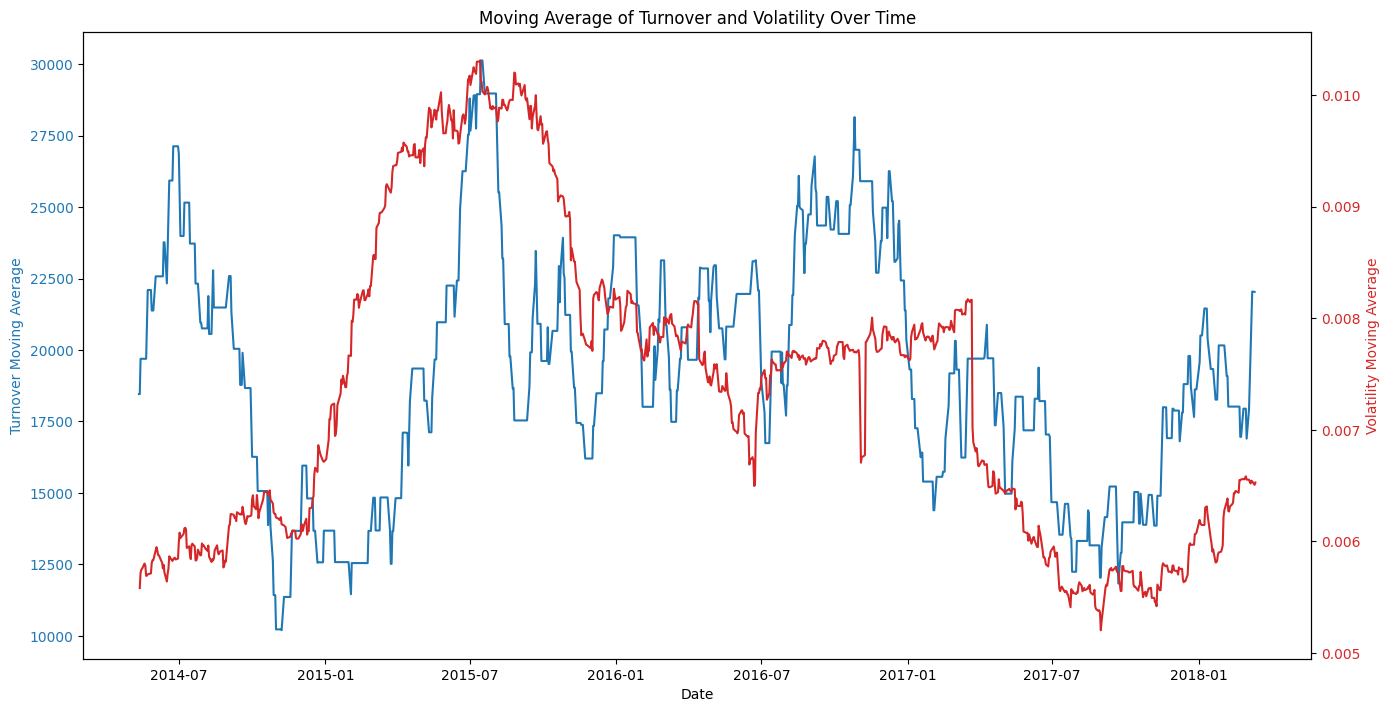

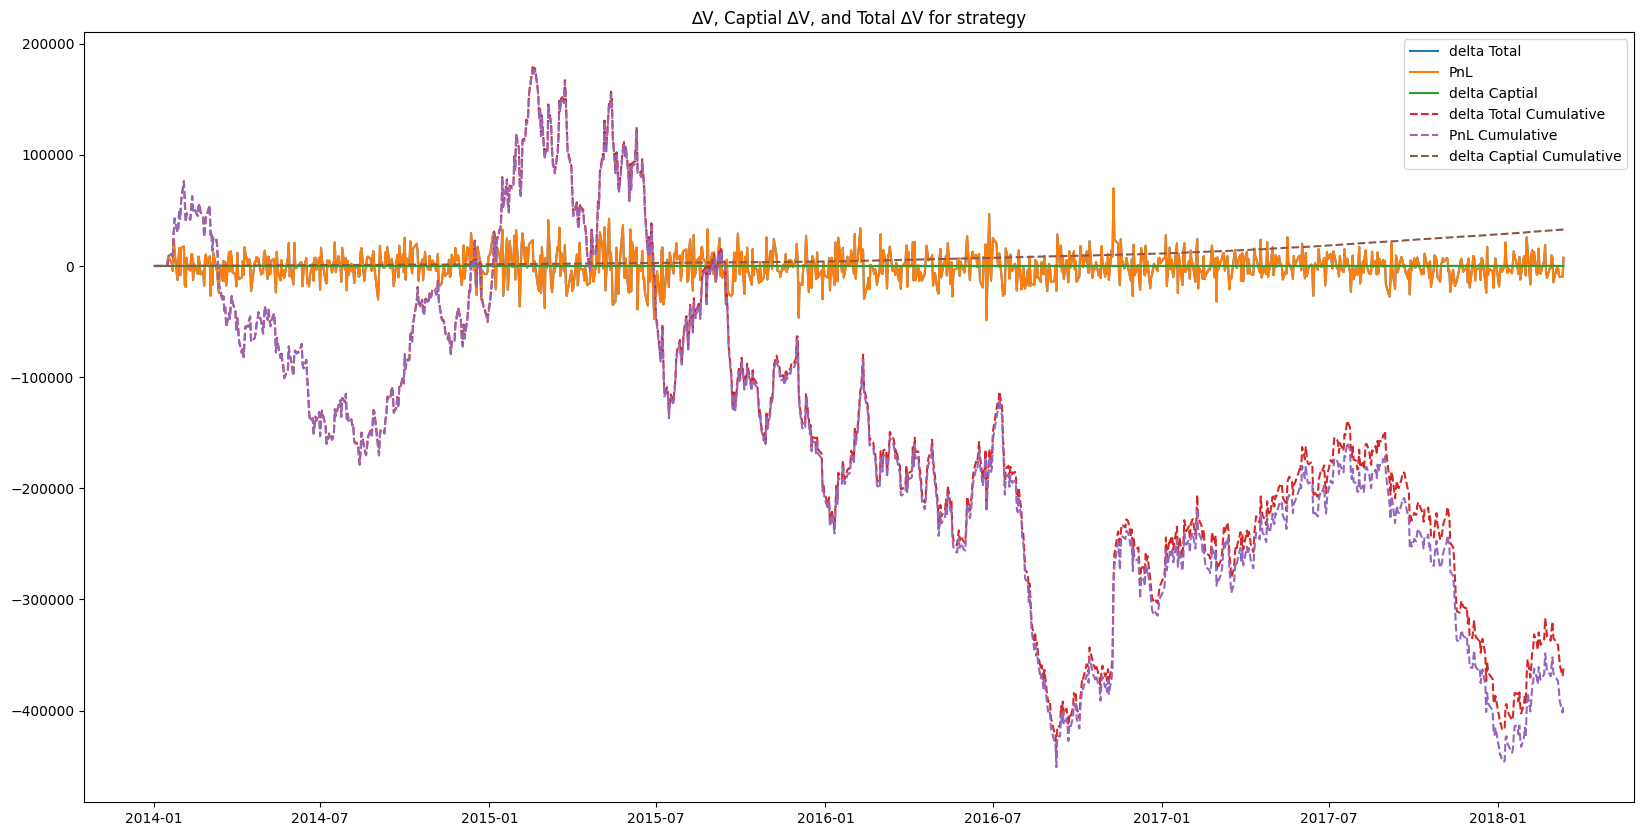

In [21]:
# Trend following for trainset
Tracking1Train = TrendFollowing(Tracking1Train,200000,10,10)
Tracking1Train.index = pd.to_datetime(Tracking1Train['Date'])

plot_trading_signal(Tracking1Train,LineName='MA')
PnL(Tracking1Train)
plotStrategies(Tracking1Train)
Turnover_dollars(Tracking1Train)
Turnover_units(Tracking1Train)
plotMATurnOver(Tracking1Train,90) # not sure what plot will be good for turnover
deltaValue(Tracking1Train)
plotDetlaValue(Tracking1Train)

/var/folders/0d/9f2qx66n7qbb98mtm5mxzlyr0000gn/T/ipykernel_26847/3280999952.py:32: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '1999997.91305542' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  dataframe.loc[i,'StockValue'] = dataframe.loc[i,'Quantity'] * dataframe.loc[i,'Close']
/var/folders/0d/9f2qx66n7qbb98mtm5mxzlyr0000gn/T/ipykernel_26847/3280999952.py:33: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '2.086944580078125' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  dataframe.loc[i,'LeverageCash'] = dataframe.loc[i,'LeverageCash'] - dataframe.loc[i,'StockValue']


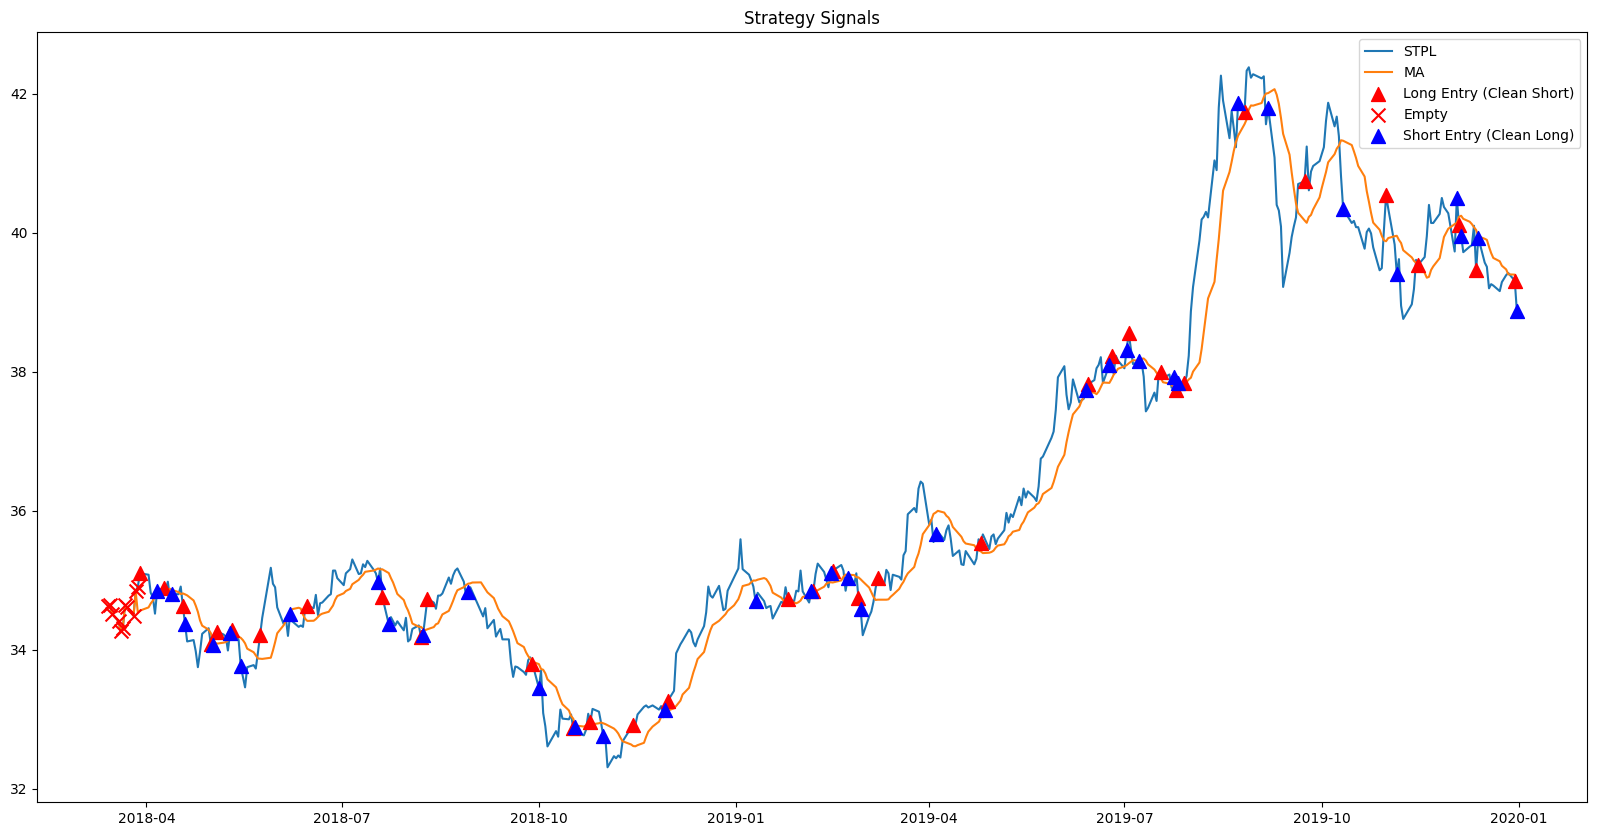

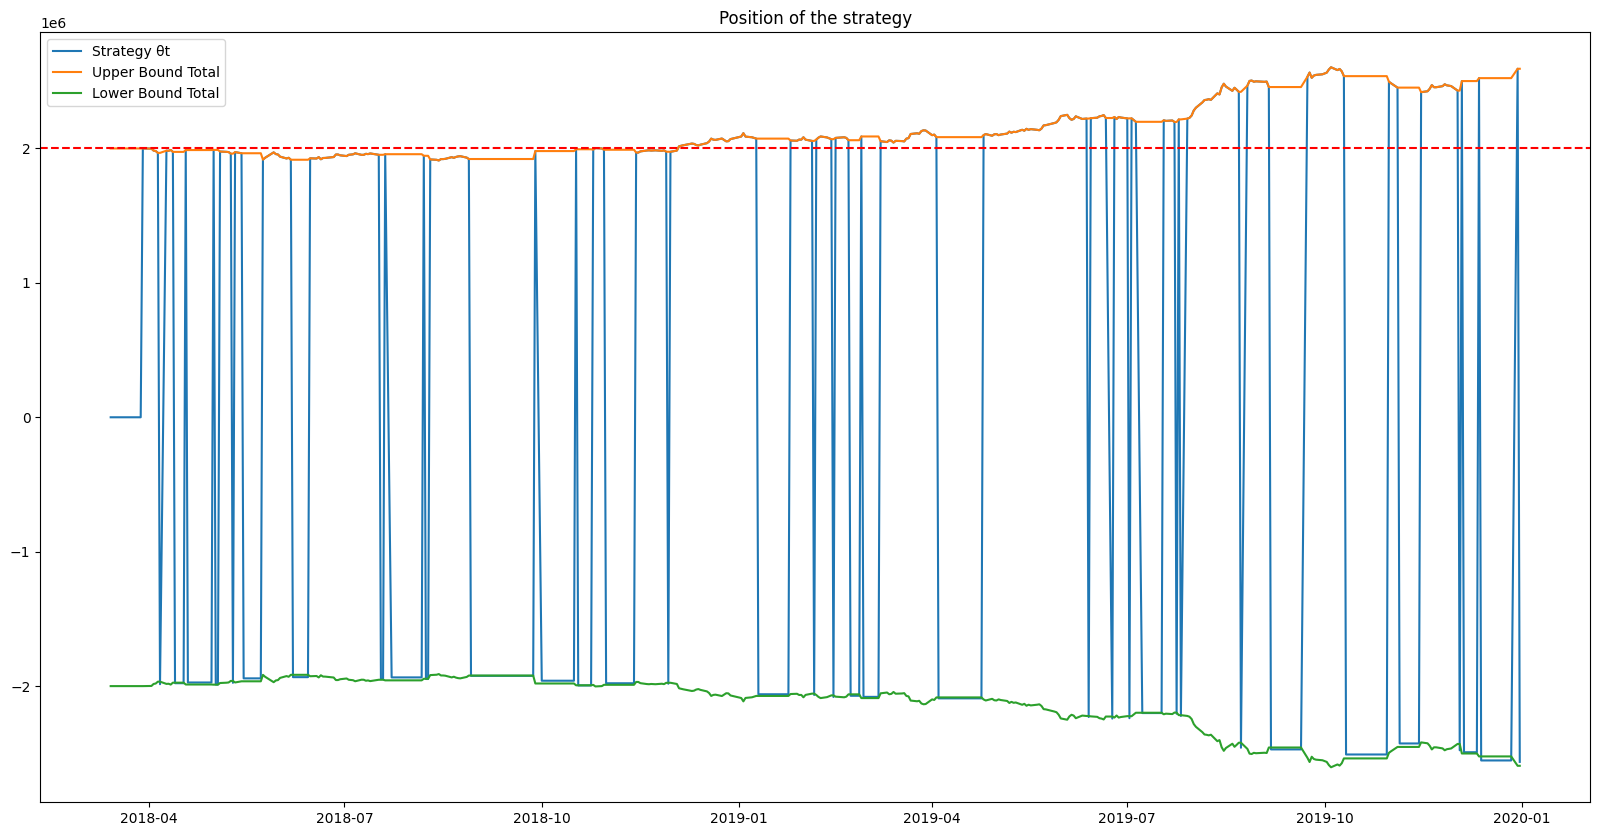

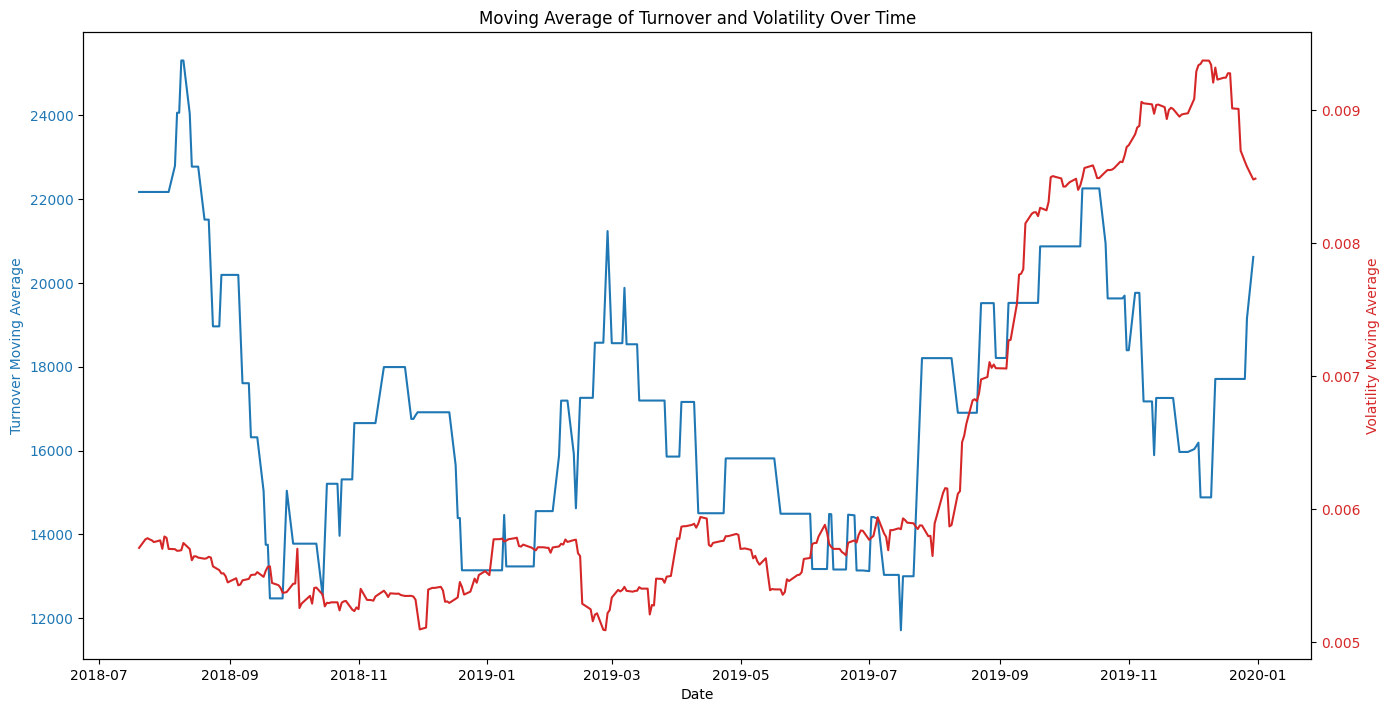

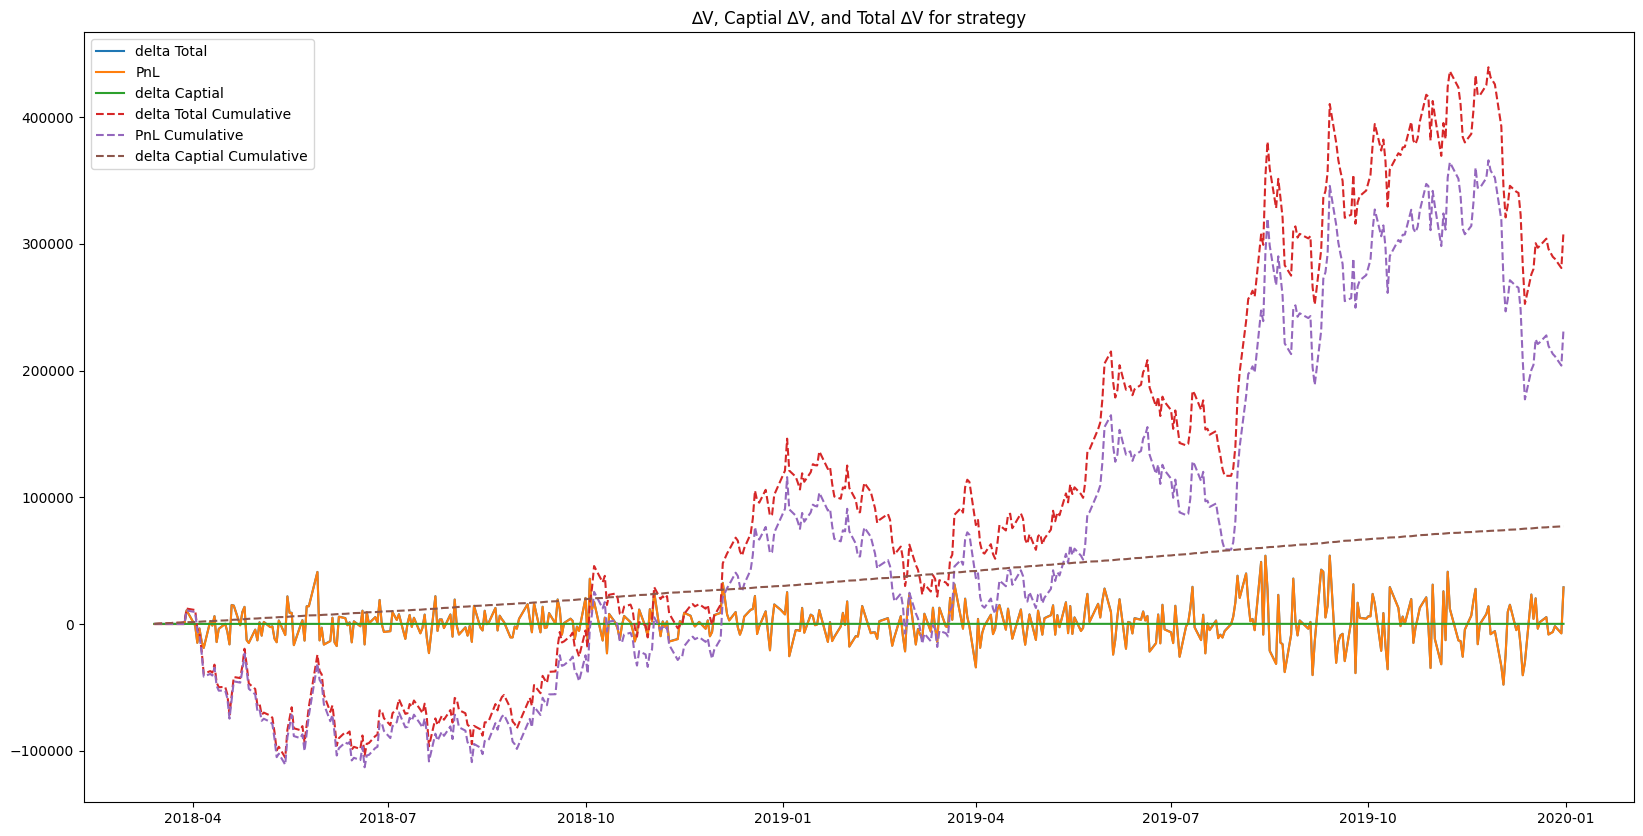

In [22]:
# Trend following for test set
Tracking1Test = TrendFollowing(Tracking1Test,200000,10,10)
Tracking1Test.index = pd.to_datetime(Tracking1Test['Date'])
plot_trading_signal(Tracking1Test,'MA')
PnL(Tracking1Test)
plotStrategies(Tracking1Test)
Turnover_dollars(Tracking1Test)
Turnover_units(Tracking1Test)
plotMATurnOver(Tracking1Test,90) # not sure what plot will be good for turnover
deltaValue(Tracking1Test)
plotDetlaValue(Tracking1Test)

Strategy 2: Mean reversion

/var/folders/0d/9f2qx66n7qbb98mtm5mxzlyr0000gn/T/ipykernel_26847/2335934010.py:88: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '-1999997.1913719177' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  dataframe.loc[i,'StockValue'] = dataframe.loc[i,'Quantity']*dataframe.loc[i,'Close']
/var/folders/0d/9f2qx66n7qbb98mtm5mxzlyr0000gn/T/ipykernel_26847/2335934010.py:29: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '2057223.1229724884' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  dataframe.loc[i,'LeverageCash'] = dataframe.loc[i-1,'LeverageCash'] + dataframe.loc[i,'StockValue']


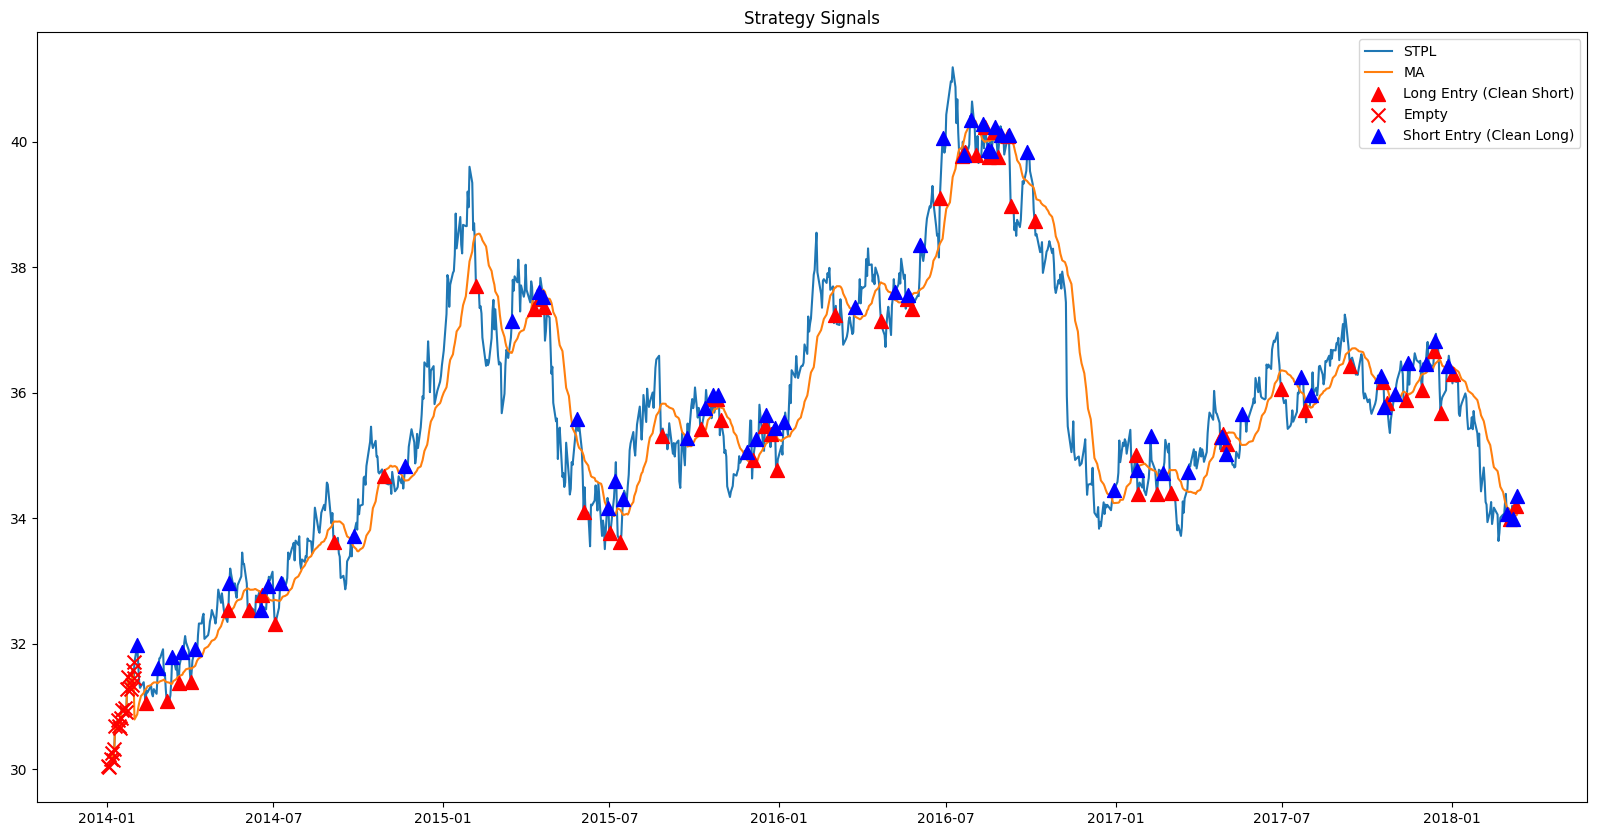

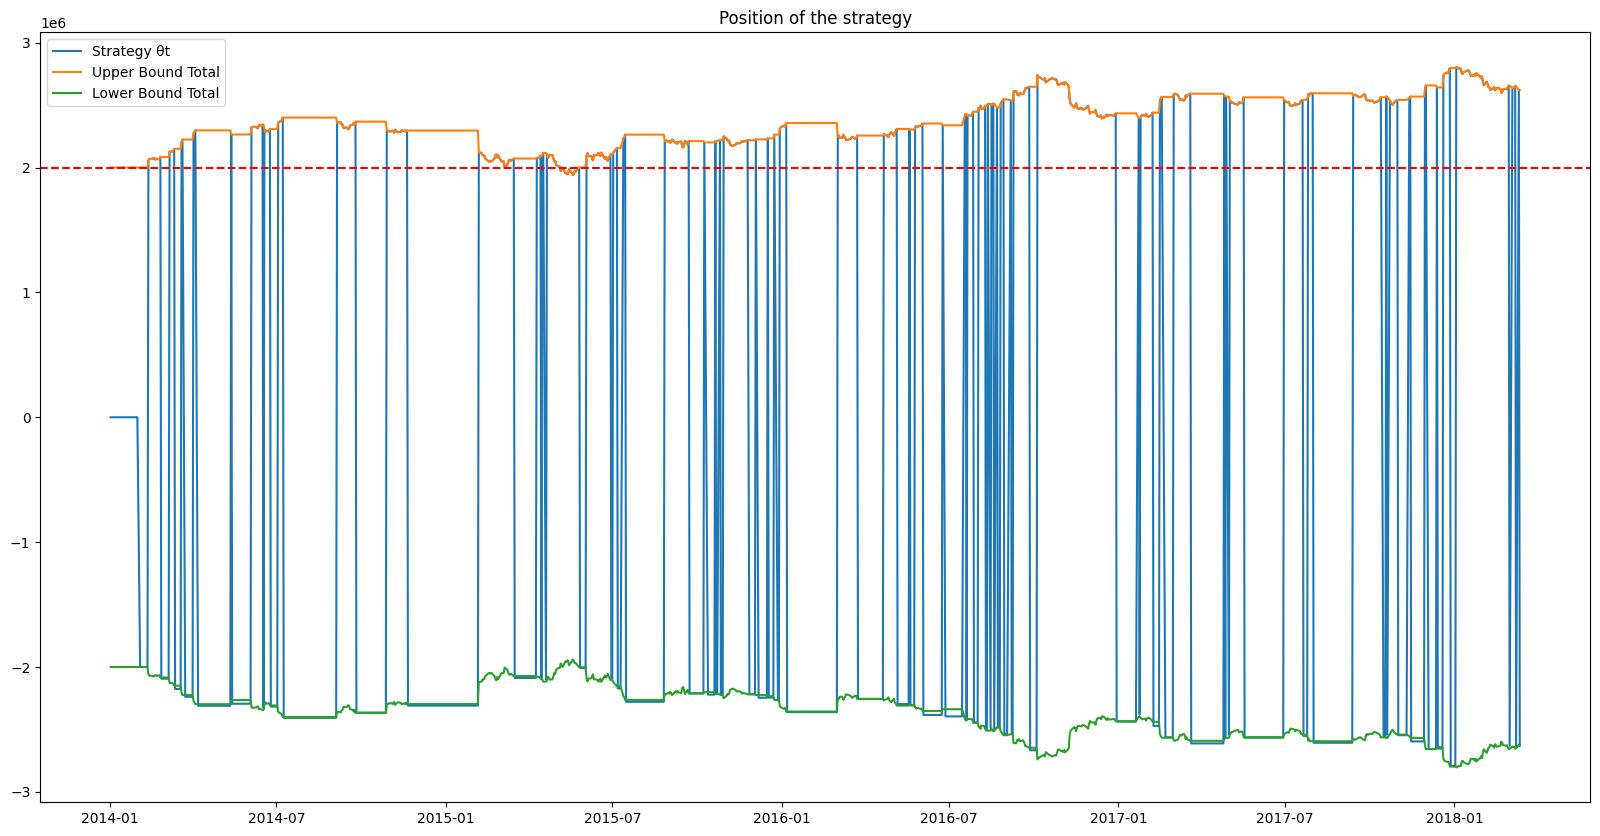

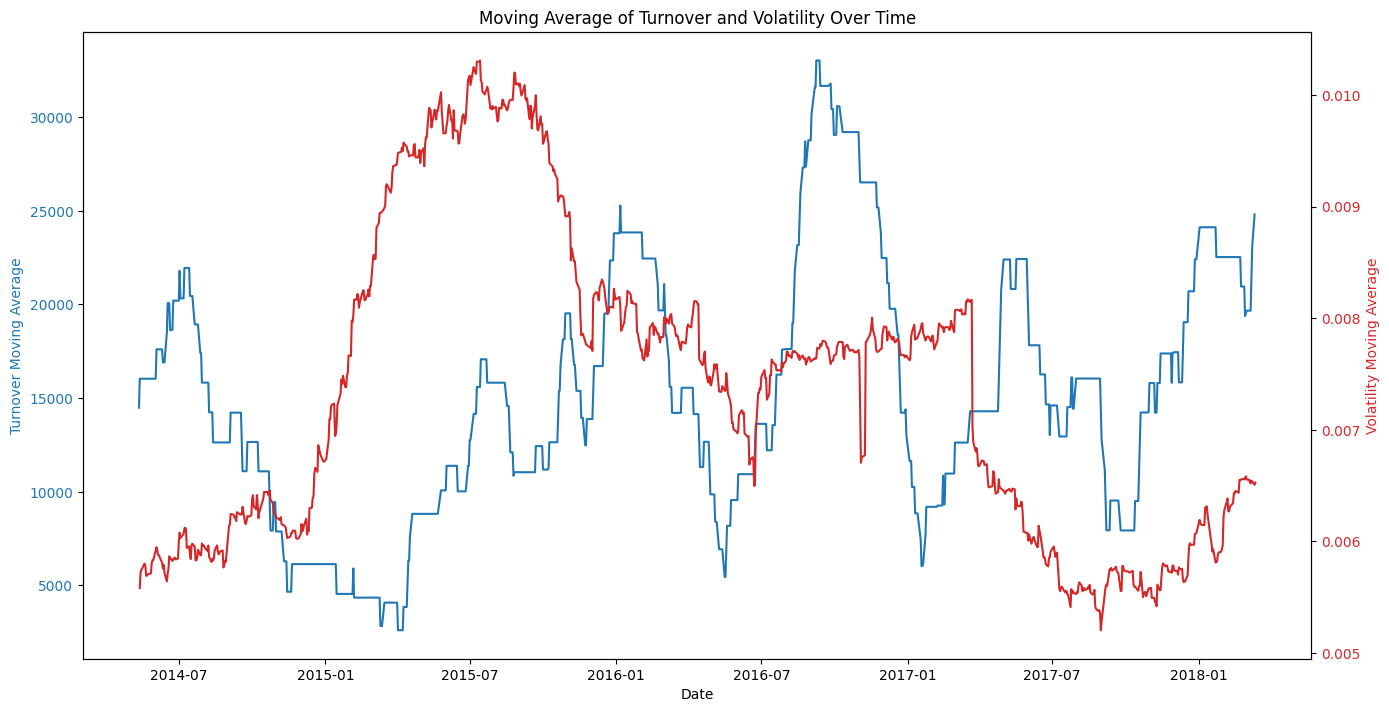

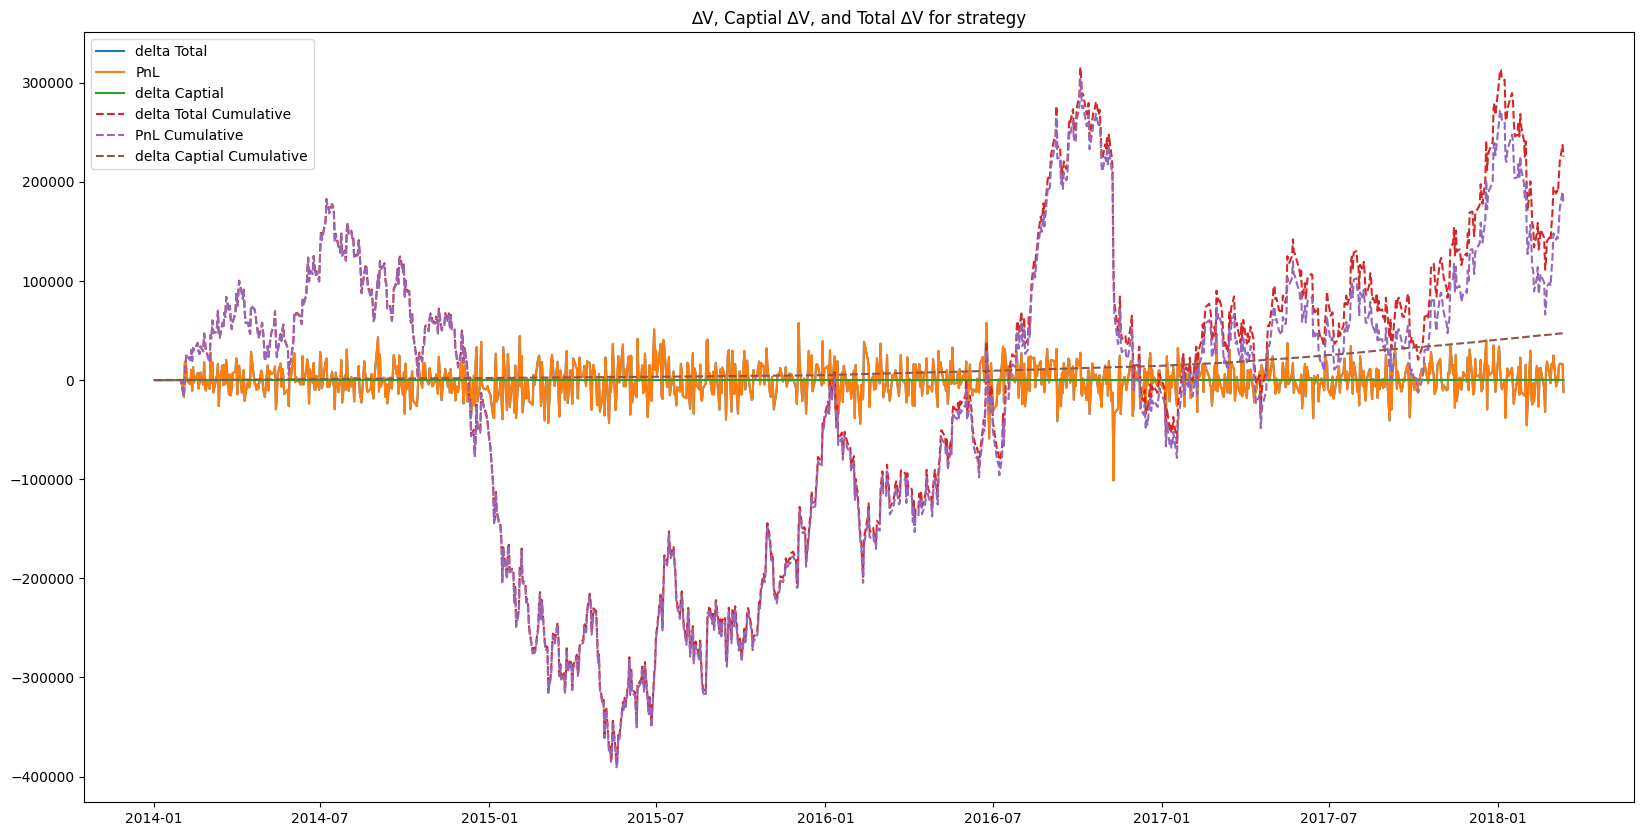

In [23]:
# Mean Reversion for trainset
Tracking2Train = MeanReversion(Tracking2Train,200000,10,20)
Tracking2Train.index = pd.to_datetime(Tracking2Train['Date'])

plot_trading_signal(Tracking2Train,'MA')
PnL(Tracking2Train)
plotStrategies(Tracking2Train)
Turnover_dollars(Tracking2Train)
Turnover_units(Tracking2Train)
plotMATurnOver(Tracking2Train,90) # not sure what plot will be good for turnover
deltaValue(Tracking2Train)
plotDetlaValue(Tracking2Train)

/var/folders/0d/9f2qx66n7qbb98mtm5mxzlyr0000gn/T/ipykernel_26847/2335934010.py:88: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '-1999990.7561531067' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  dataframe.loc[i,'StockValue'] = dataframe.loc[i,'Quantity']*dataframe.loc[i,'Close']
/var/folders/0d/9f2qx66n7qbb98mtm5mxzlyr0000gn/T/ipykernel_26847/2335934010.py:29: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '2024712.5475387573' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  dataframe.loc[i,'LeverageCash'] = dataframe.loc[i-1,'LeverageCash'] + dataframe.loc[i,'StockValue']


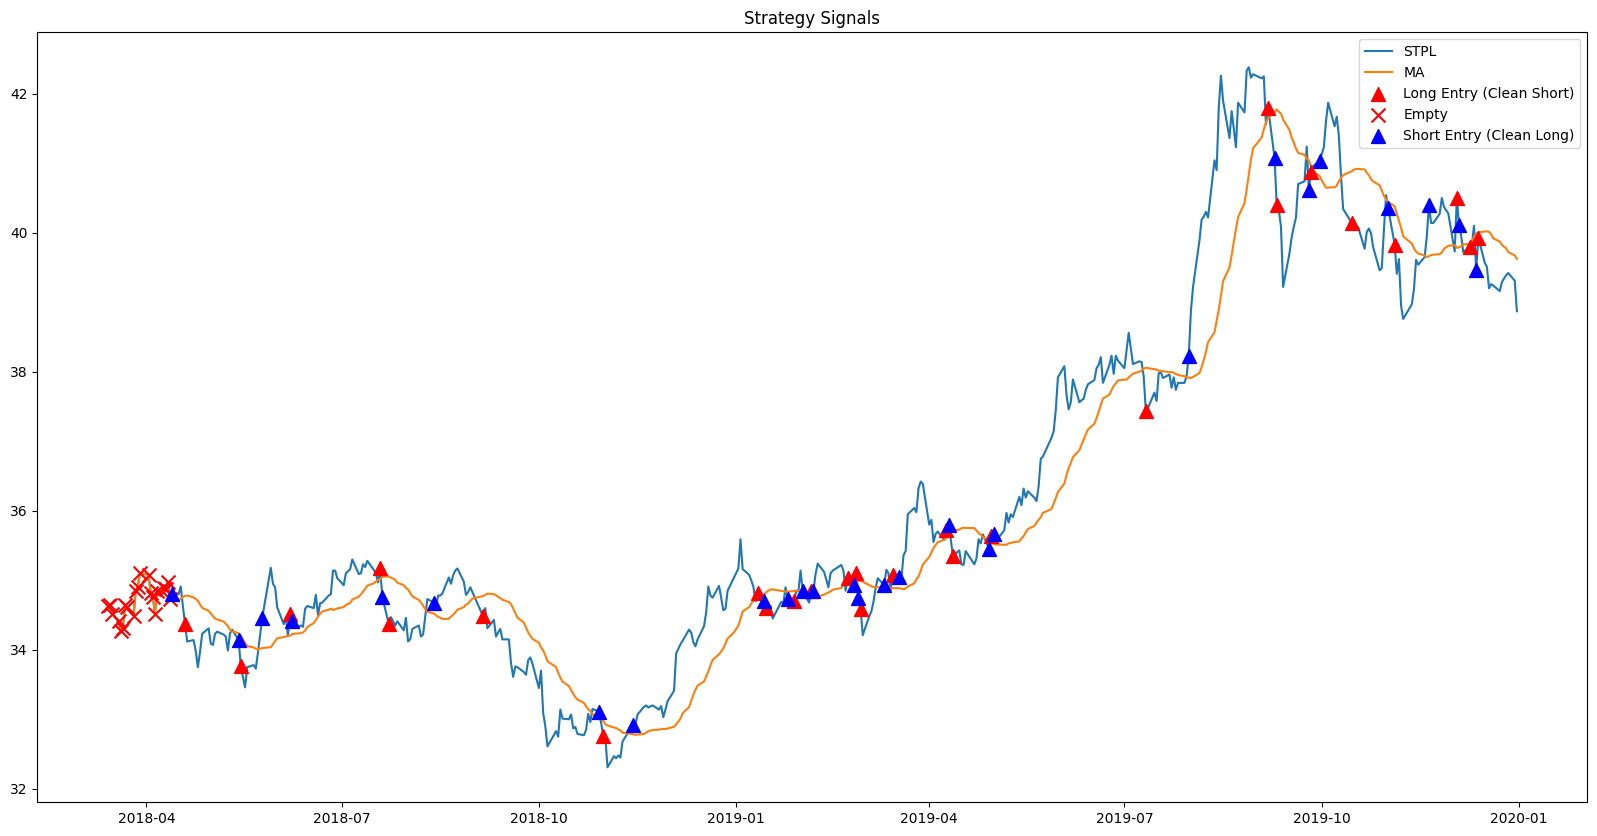

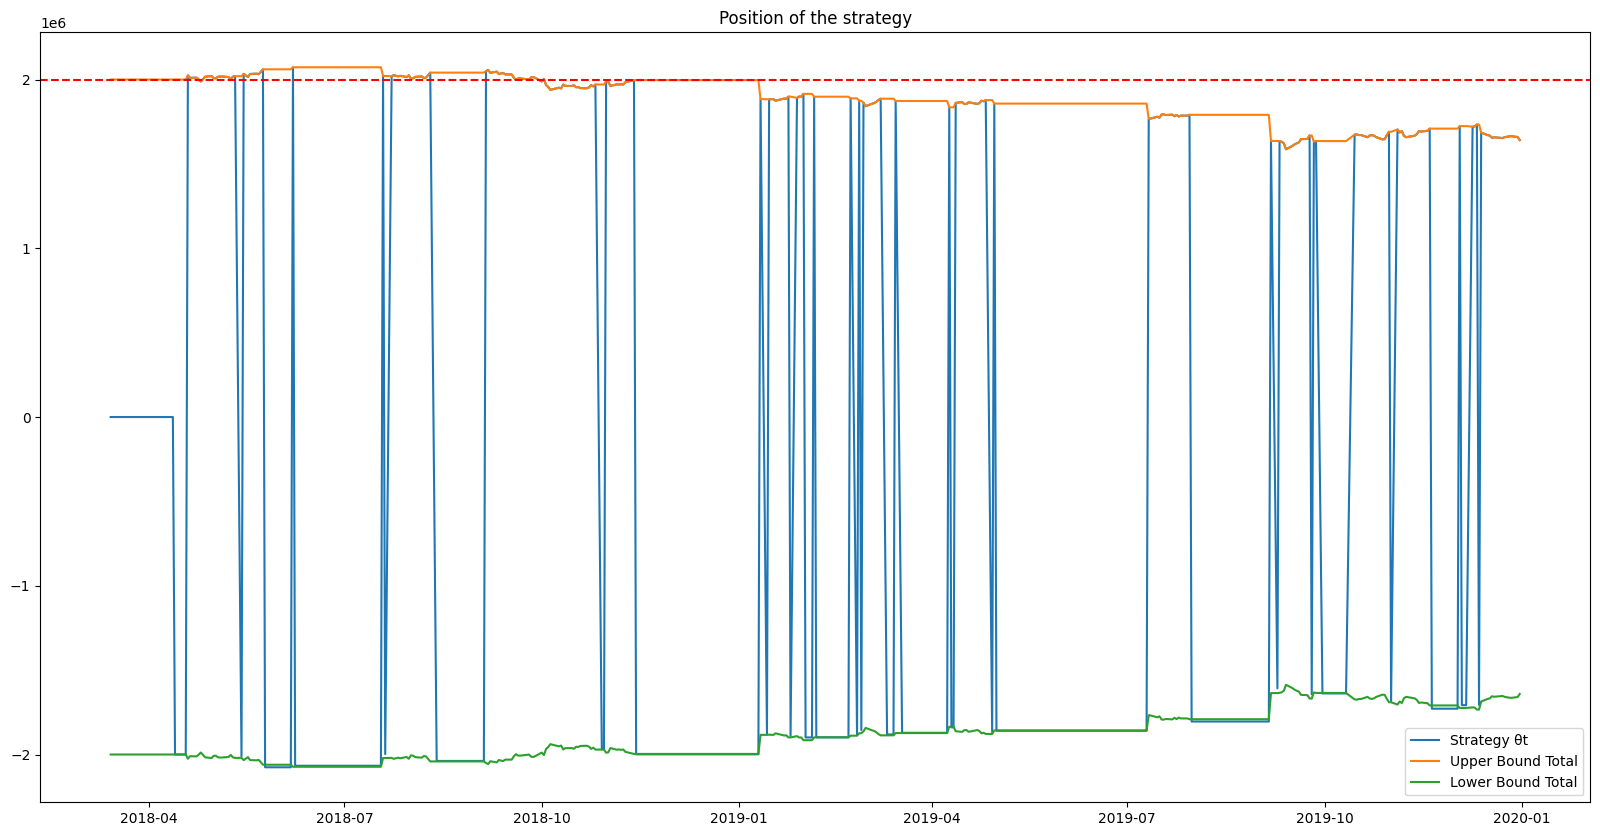

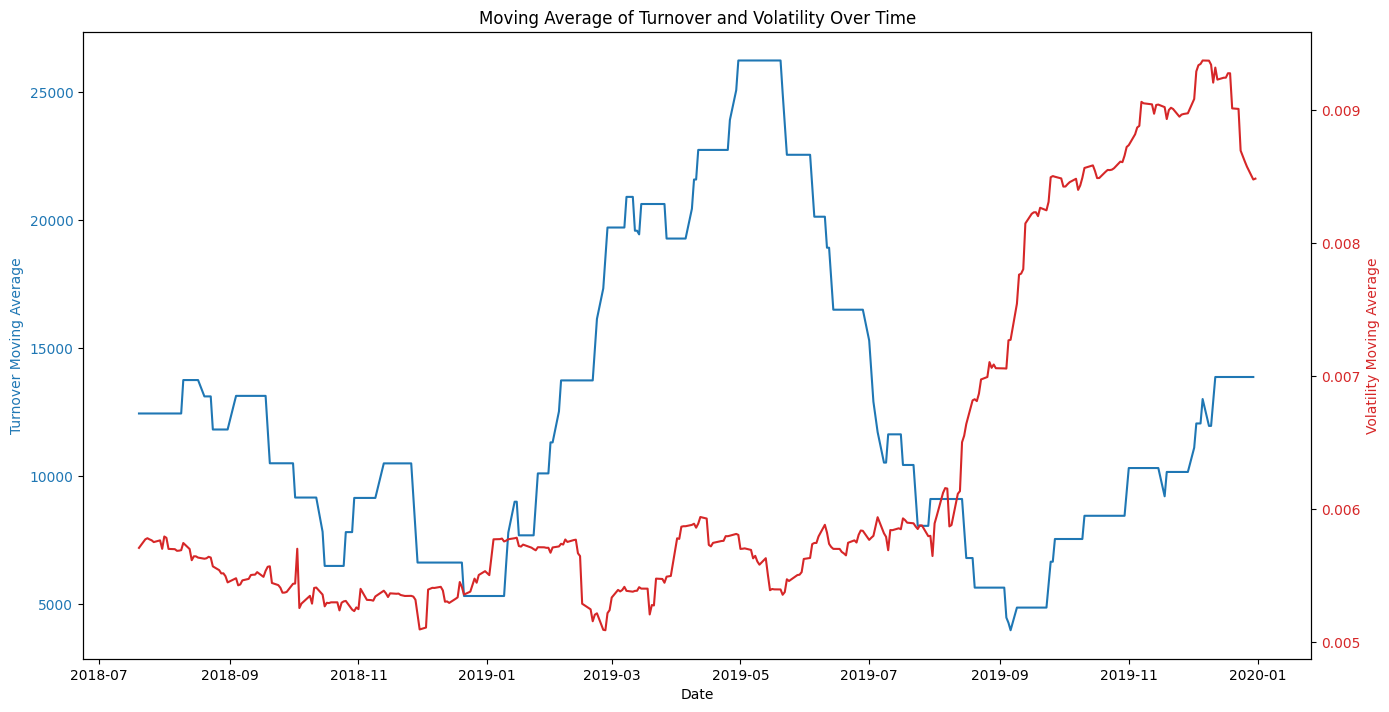

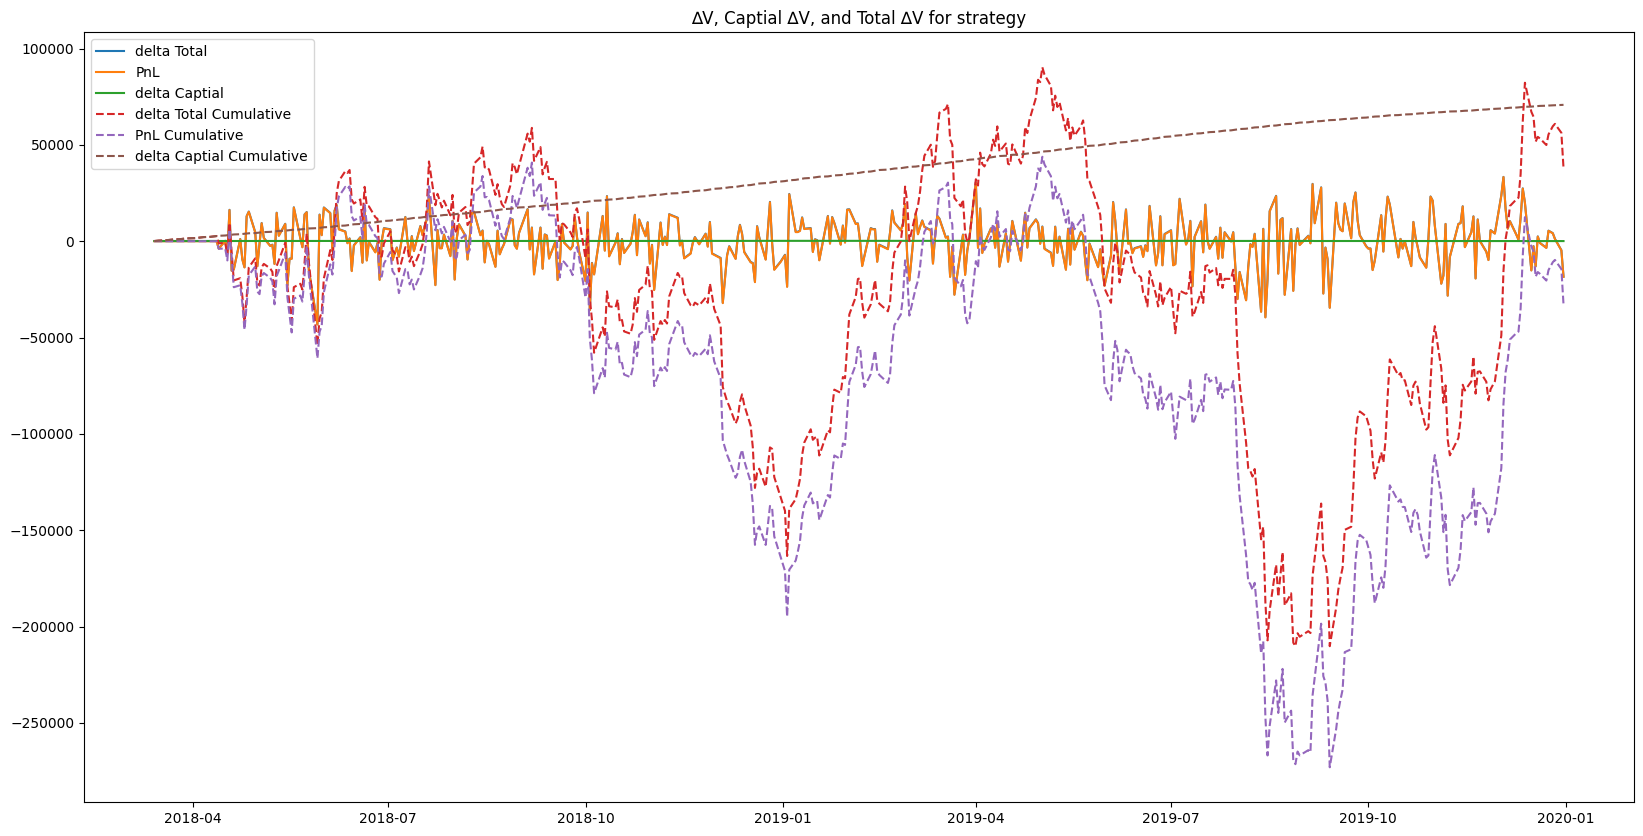

In [24]:
# Mean Reversion for test set
Tracking2Test = MeanReversion(Tracking2Test,200000,10,20)
Tracking2Test.index = pd.to_datetime(Tracking2Test['Date'])

plot_trading_signal(Tracking2Test,'MA')
PnL(Tracking2Test)
plotStrategies(Tracking2Test)
Turnover_dollars(Tracking2Test)
Turnover_units(Tracking2Test)
plotMATurnOver(Tracking2Test,90) # not sure what plot will be good for turnover
deltaValue(Tracking2Test)
plotDetlaValue(Tracking2Test)

Strategy 3: AR model

/var/folders/0d/9f2qx66n7qbb98mtm5mxzlyr0000gn/T/ipykernel_26847/2378047319.py:36: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '1988966.485048294' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  dataframe.loc[i,'LeverageCash'] = dataframe.loc[i-1,'LeverageCash'] + dataframe.loc[i,'StockValue']


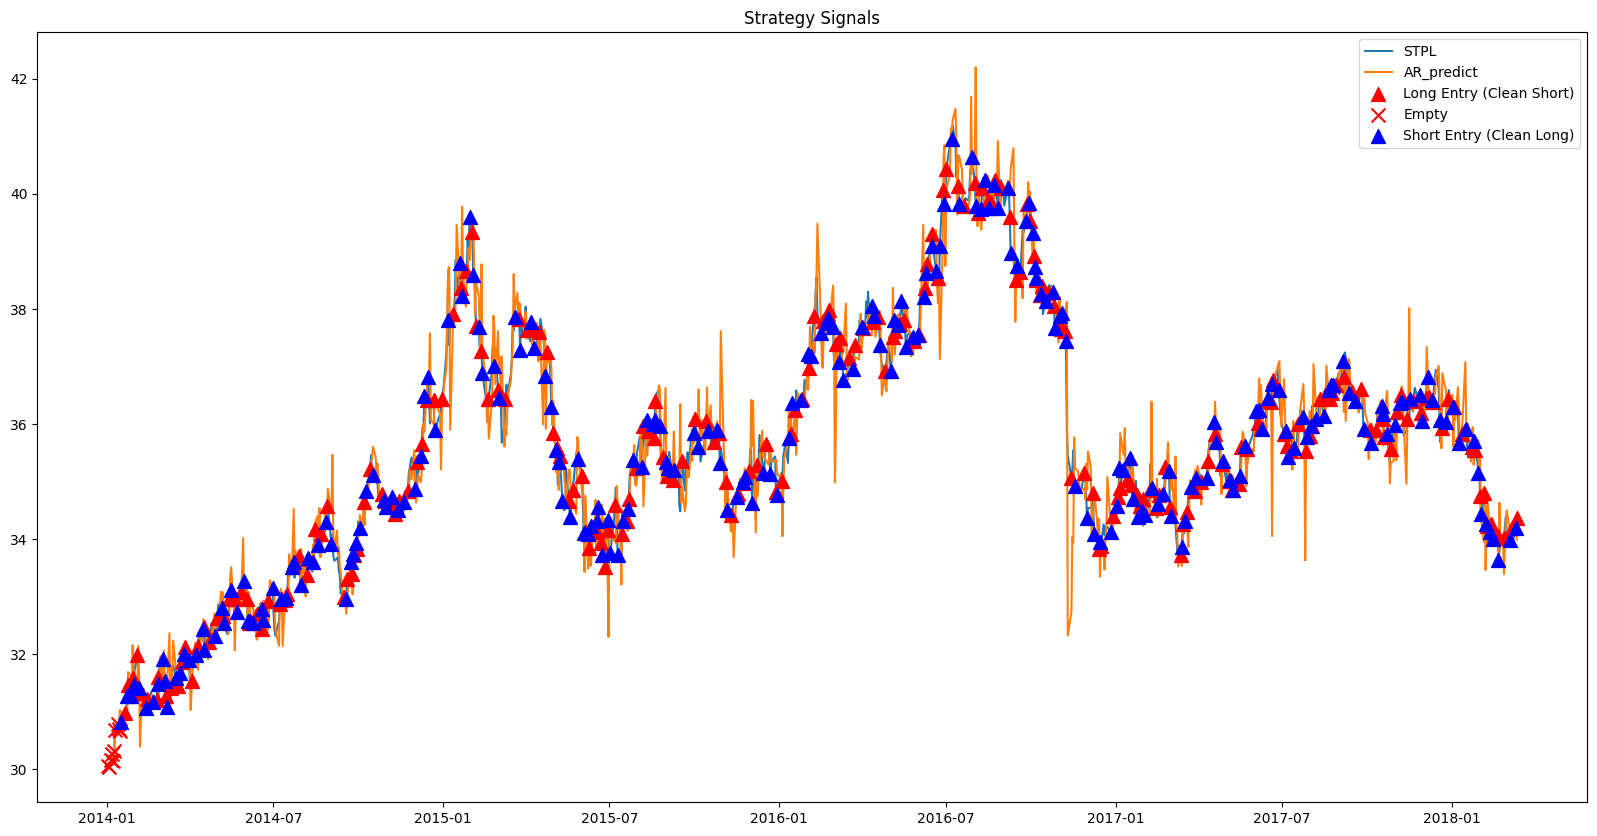

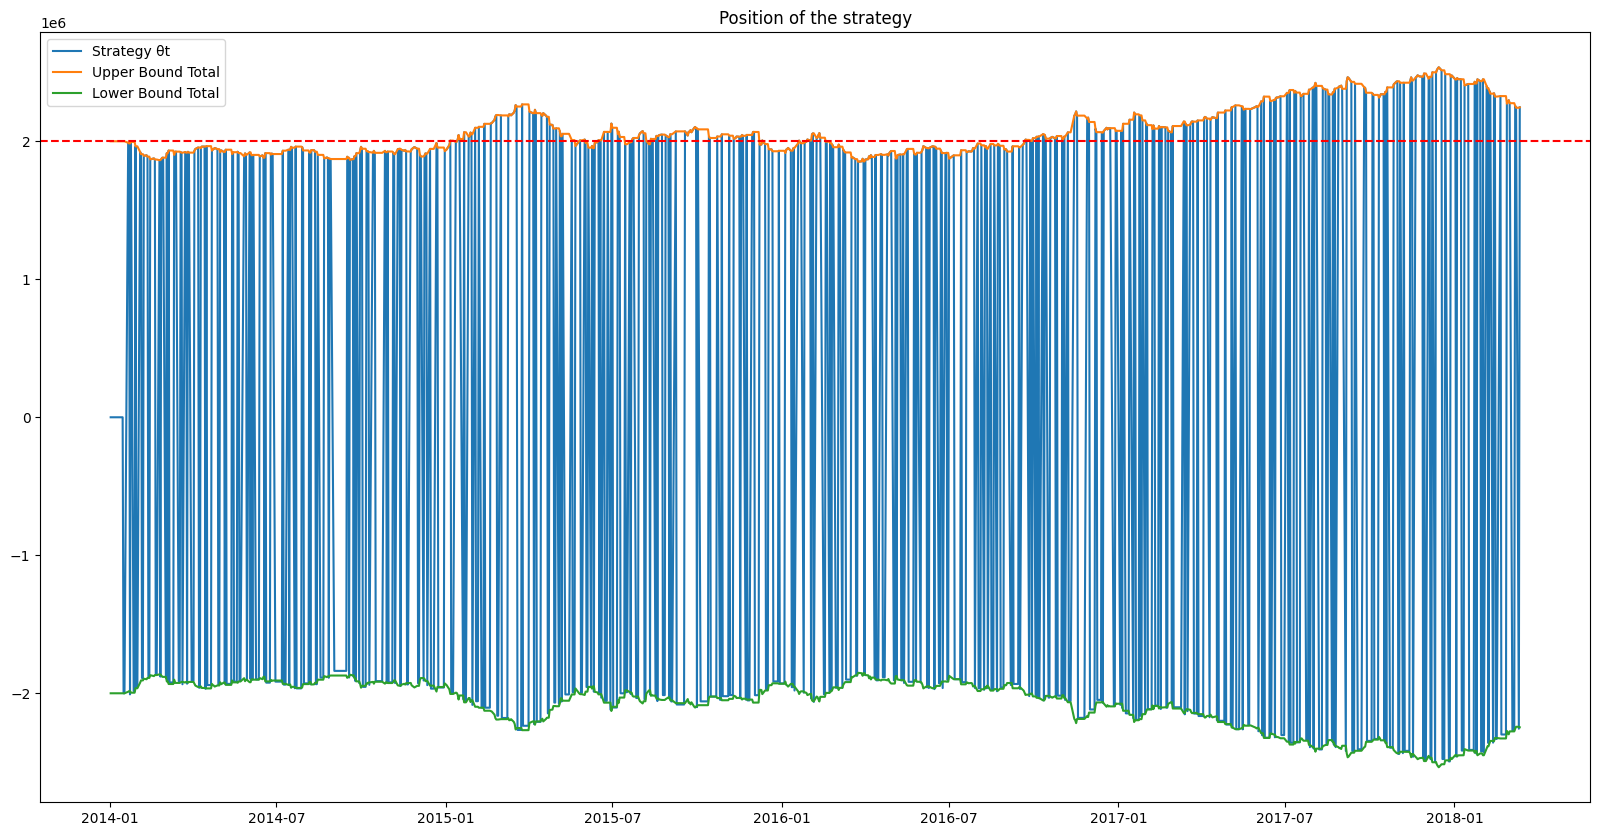

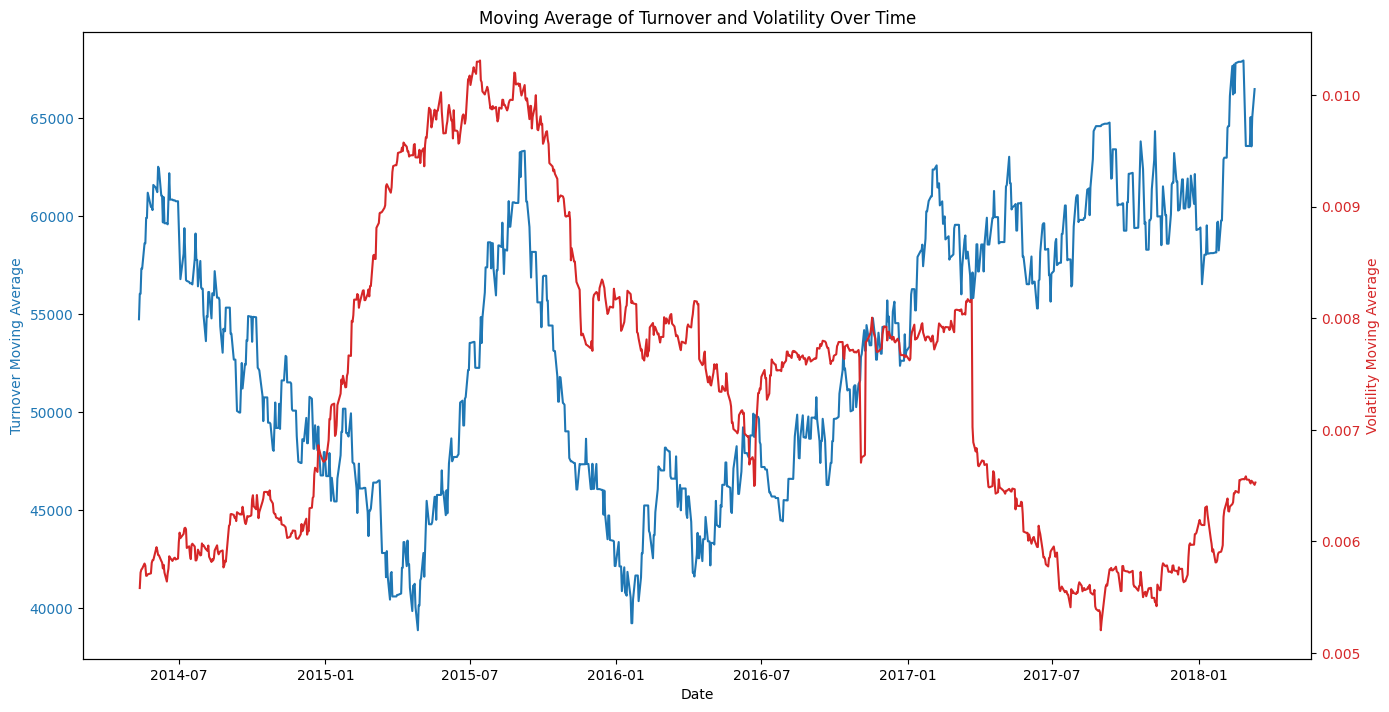

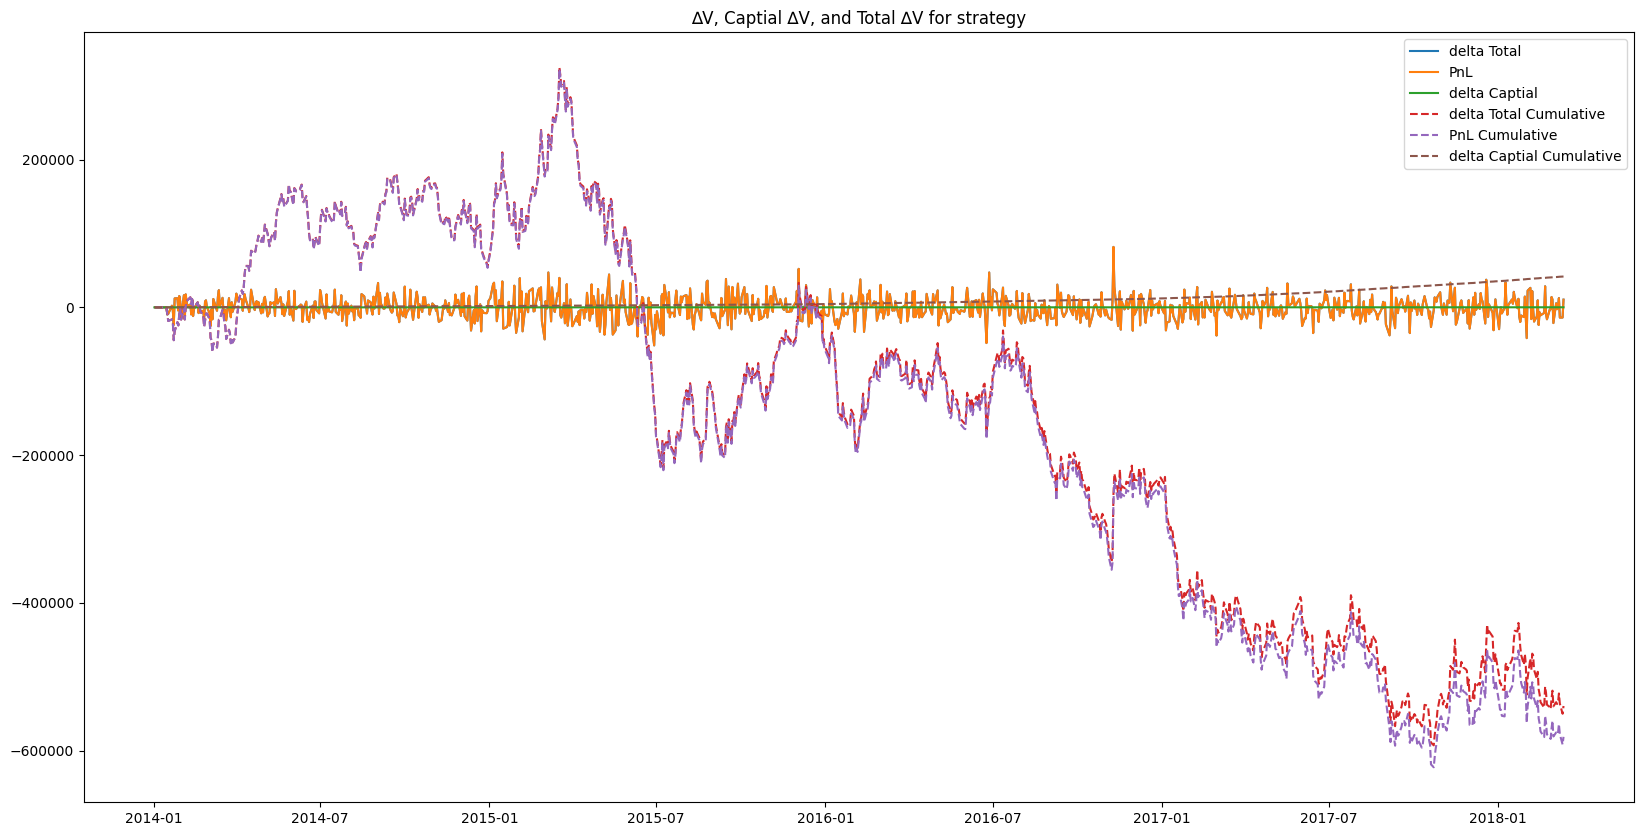

In [25]:
# ARmodel for trainset
Tracking3Train = ARModel(Tracking3Train,200000,10,9)
Tracking3Train.index = pd.to_datetime(Tracking3Train['Date'])
plot_trading_signal(Tracking3Train,'AR_predict')
PnL(Tracking3Train)
plotStrategies(Tracking3Train)
Turnover_dollars(Tracking3Train)
Turnover_units(Tracking3Train)
plotMATurnOver(Tracking3Train,90) # not sure what plot will be good for turnover
deltaValue(Tracking3Train)
plotDetlaValue(Tracking3Train)

/var/folders/0d/9f2qx66n7qbb98mtm5mxzlyr0000gn/T/ipykernel_26847/2378047319.py:41: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '6.108741760253906' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  dataframe.loc[i,'LeverageCash'] = dataframe.loc[i,'LeverageCash'] - dataframe.loc[i,'StockValue']


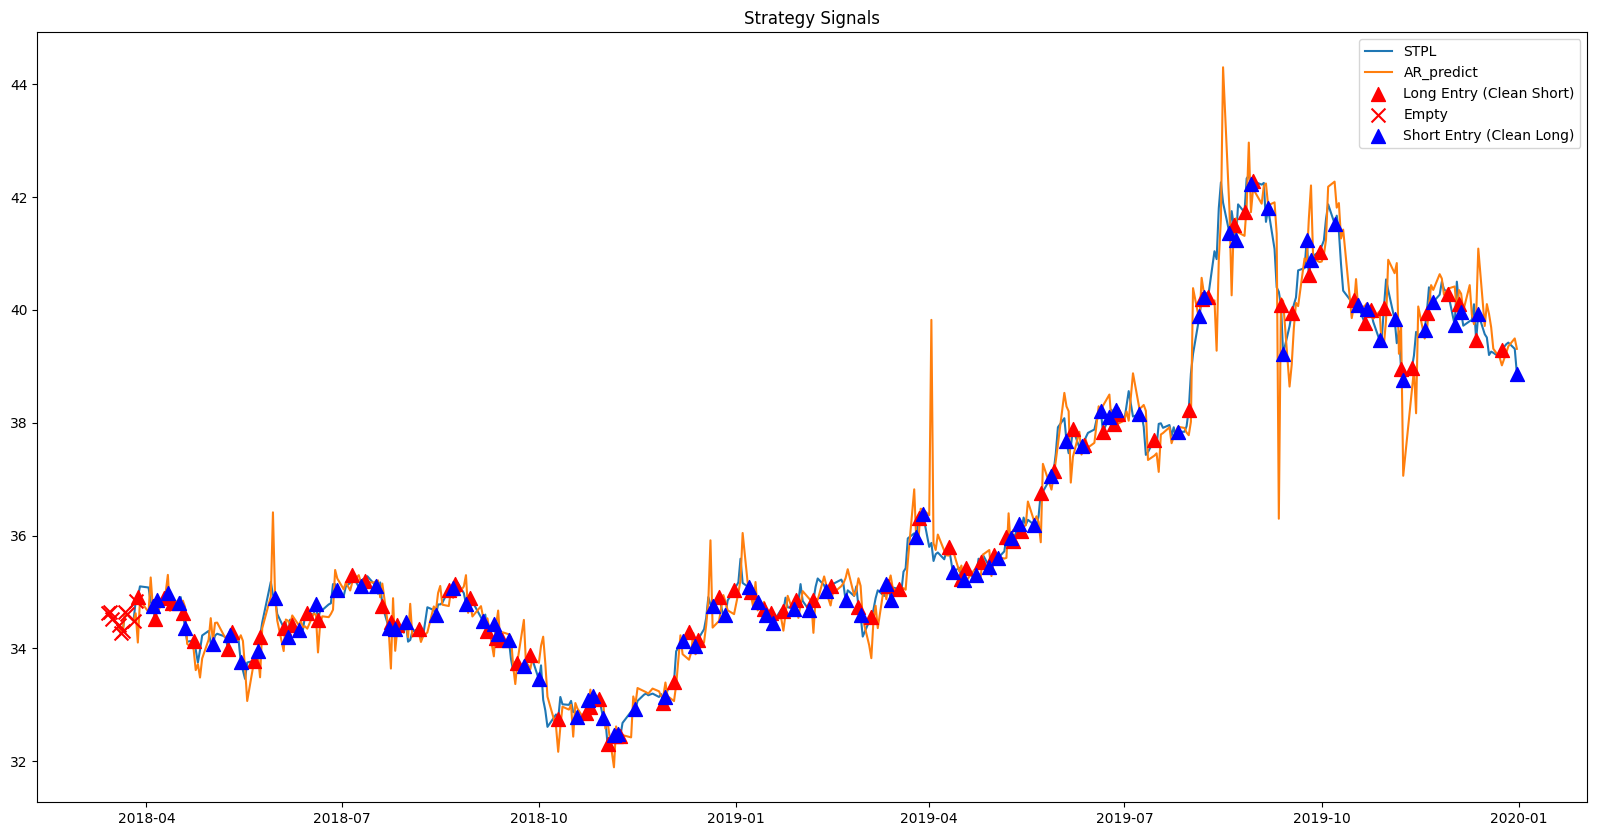

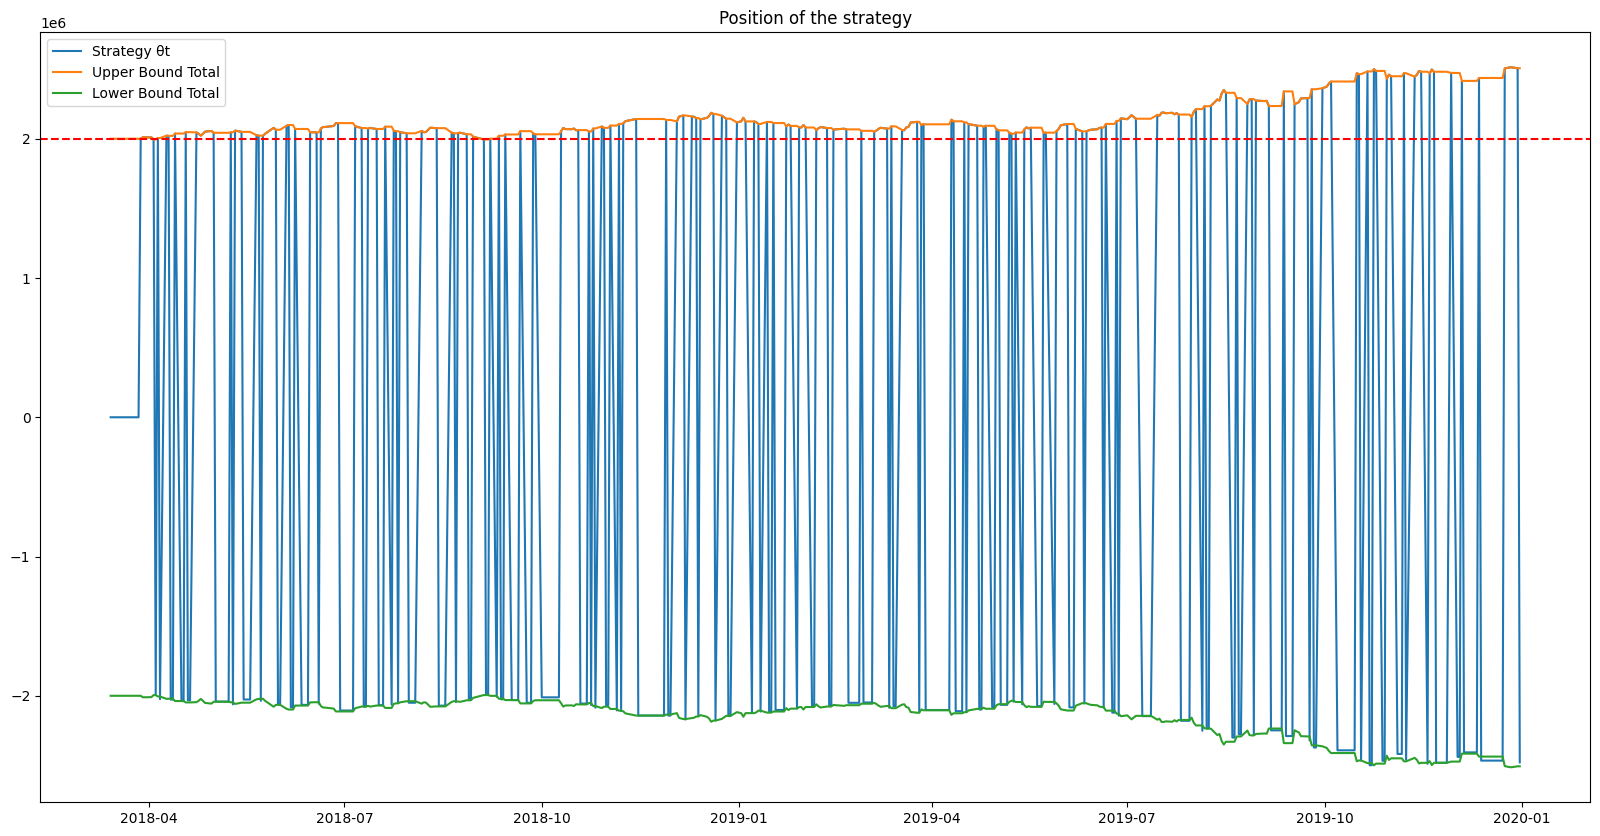

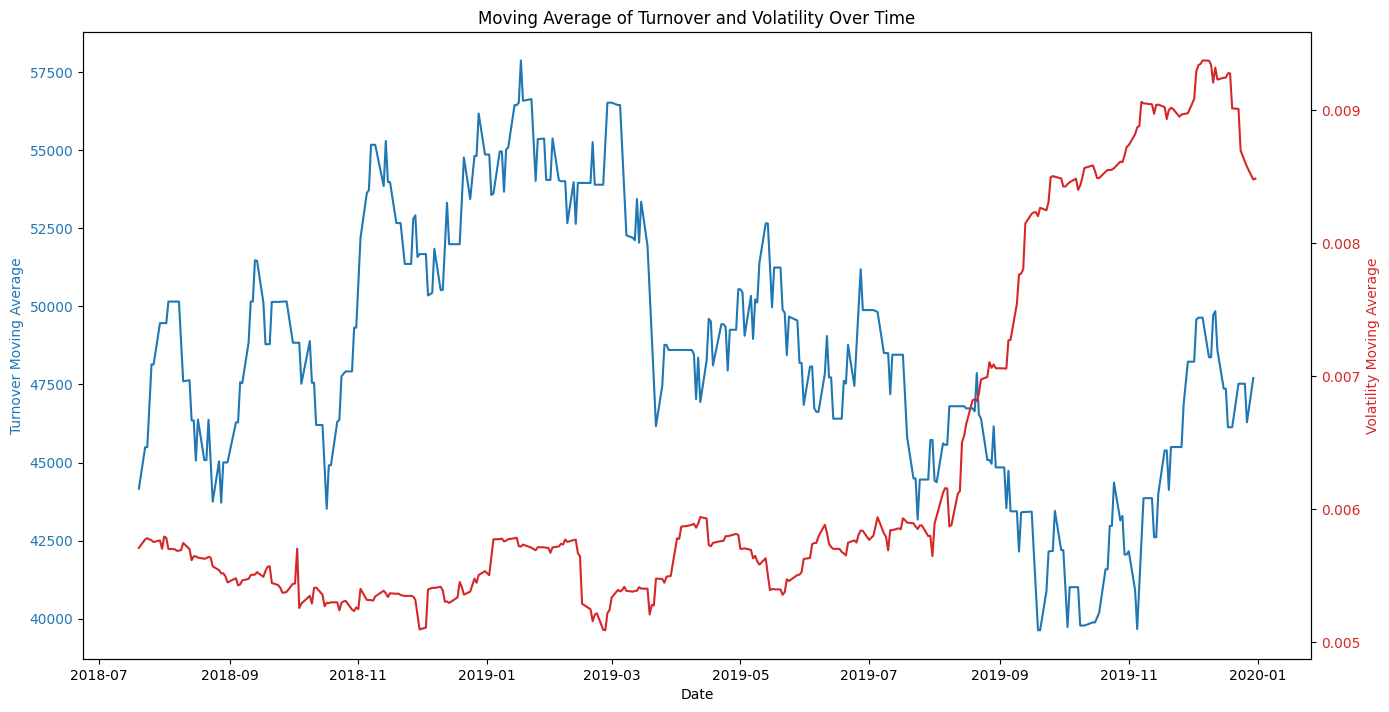

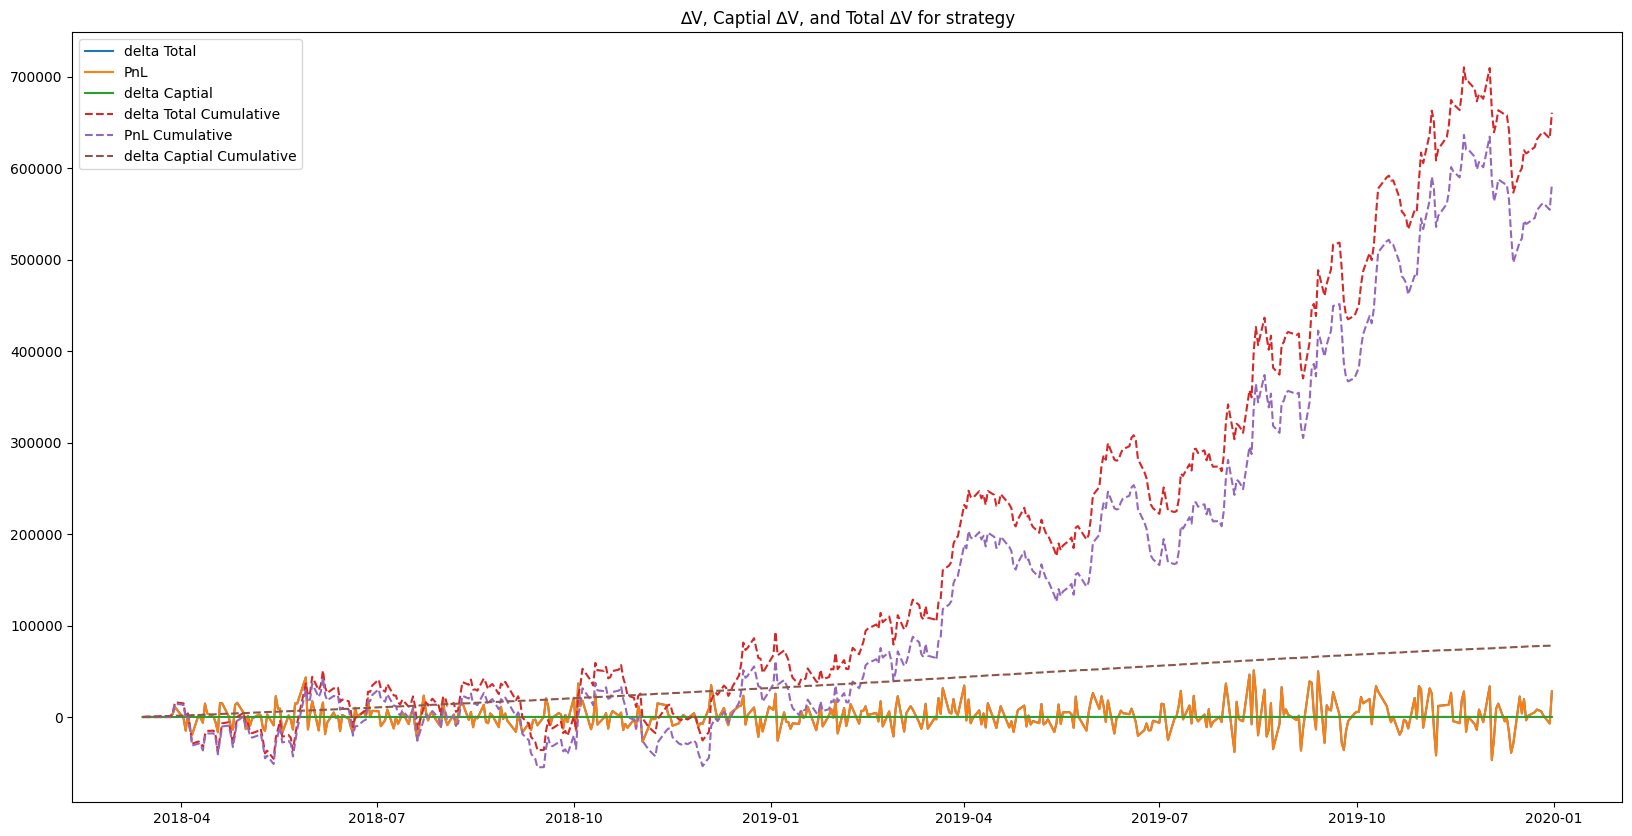

In [26]:
# ARModel for test set
Tracking3Test = ARModel(Tracking3Test,200000,10,9)
Tracking3Test.index = pd.to_datetime(Tracking3Test['Date'])
plot_trading_signal(Tracking3Test,'AR_predict')
PnL(Tracking3Test)
plotStrategies(Tracking3Test)
Turnover_dollars(Tracking3Test)
Turnover_units(Tracking3Test)
plotMATurnOver(Tracking3Test,90) # not sure what plot will be good for turnover
deltaValue(Tracking3Test)
plotDetlaValue(Tracking3Test)

plot cumulative turnover 

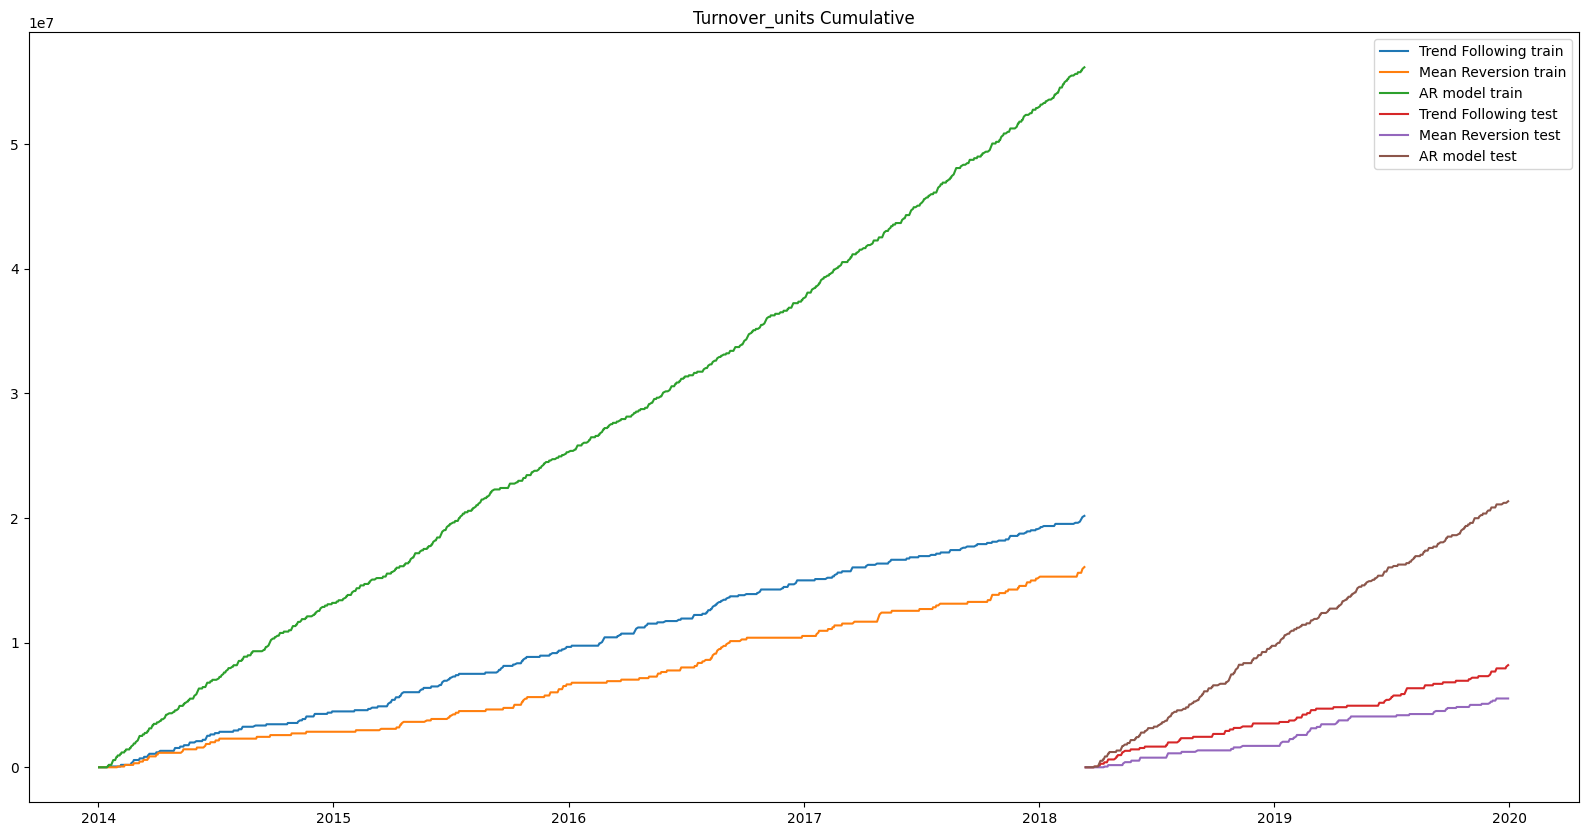

In [27]:
plt.figure(figsize=(20,10))
plt.plot(Tracking1Train['Turnover_units_Cumsum'],label='Trend Following train')
plt.plot(Tracking2Train['Turnover_units_Cumsum'],label='Mean Reversion train')
plt.plot(Tracking3Train['Turnover_units_Cumsum'],label='AR model train')
plt.plot(Tracking1Test['Turnover_units_Cumsum'],label='Trend Following test')
plt.plot(Tracking2Test['Turnover_units_Cumsum'],label='Mean Reversion test')
plt.plot(Tracking3Test['Turnover_units_Cumsum'],label='AR model test')
plt.title('Turnover_units Cumulative')
plt.legend()
plt.show()


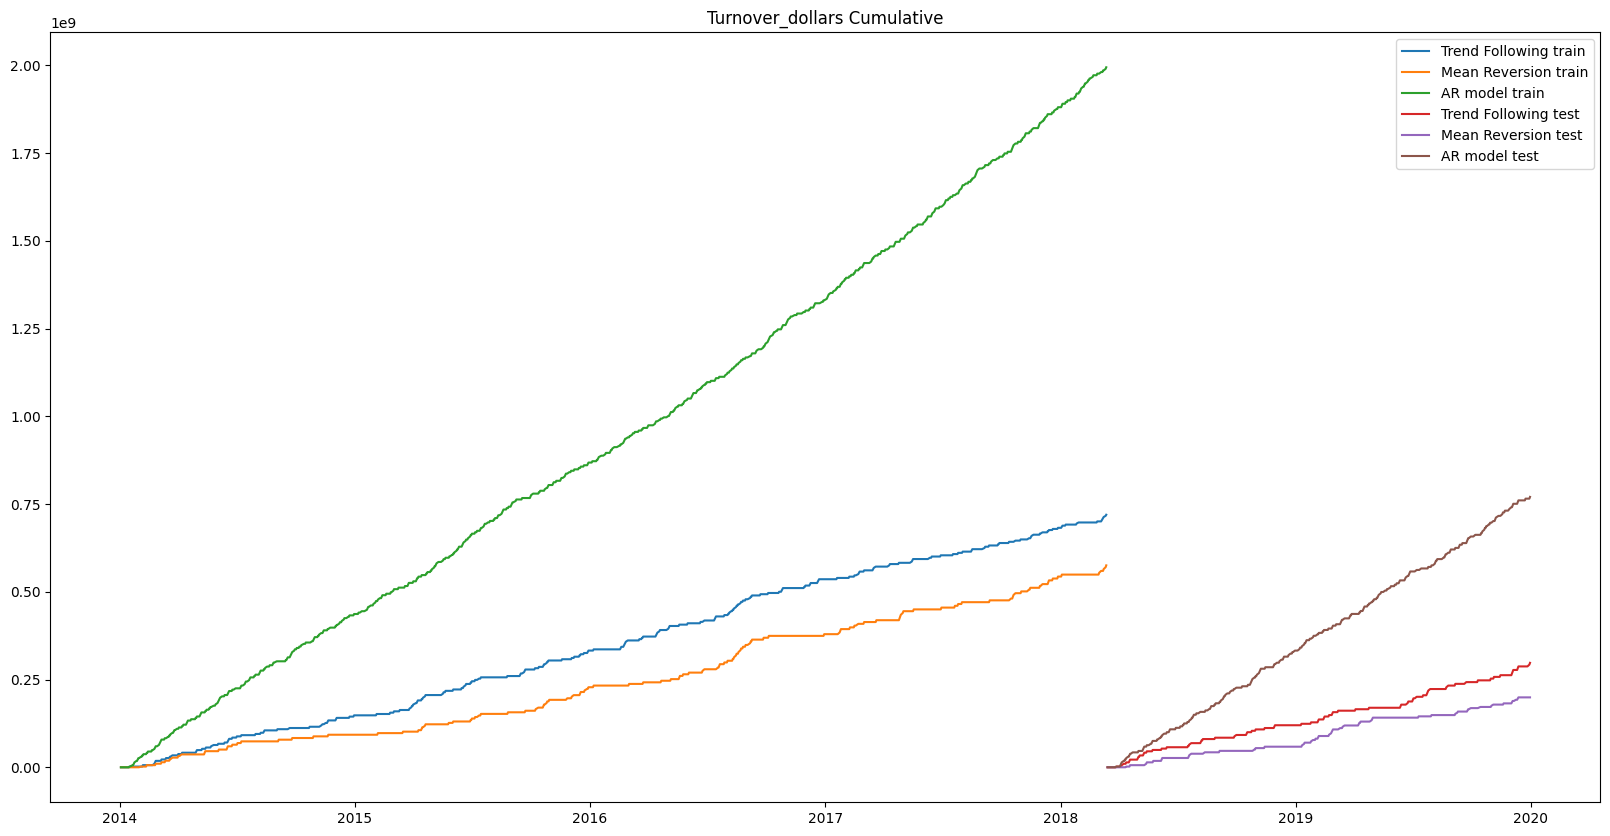

In [28]:
plt.figure(figsize=(20,10))
plt.plot(Tracking1Train['Turnover_dollars_Cumsum'],label='Trend Following train')
plt.plot(Tracking2Train['Turnover_dollars_Cumsum'],label='Mean Reversion train')
plt.plot(Tracking3Train['Turnover_dollars_Cumsum'],label='AR model train')
plt.plot(Tracking1Test['Turnover_dollars_Cumsum'],label='Trend Following test')
plt.plot(Tracking2Test['Turnover_dollars_Cumsum'],label='Mean Reversion test')
plt.plot(Tracking3Test['Turnover_dollars_Cumsum'],label='AR model test')
plt.title('Turnover_dollars Cumulative')
plt.legend()
plt.show()


# Performance Indicator 

In [29]:
# Performance  Indicator
# Sharpe Ratio
def ShapeRatio(dataframe):
    mean_excess_return = dataframe['PnL'].mean()
    return_std = dataframe['PnL'].std()
    return mean_excess_return / return_std

# Sortino Ratio
def SortinoRatio(dataframe):
    # Choose a negative excess return
    negative_excess_returns = dataframe['PnL'][dataframe['PnL'] < 0]
    # Calculate the standard deviation of negative excess return (downside risk)
    downside_std_dev = negative_excess_returns.std()
    # If the downside risk is 0 (avoid dividing by 0), you can choose to return a predefined value or NaN
    if downside_std_dev == 0:
        return float('NAN')  
    # Calculate the average value of excess return
    mean_excess_return = dataframe['PnL'].mean()
    sortino_ratio = mean_excess_return / downside_std_dev
    return sortino_ratio

# Maximum Drawdown
def MaximumDrawdown(dataframe):
    dataframe['PnLDailyRate'] = dataframe['PnL'].pct_change()
    dataframe['PnLDailyRate']=dataframe['PnLDailyRate'].replace([np.inf,-np.inf,np.nan],0)
    dataframe['Cumulative_Return'] = (1+dataframe['PnLDailyRate']).cumprod()
    peak = dataframe['Cumulative_Return'].expanding(min_periods=1).max()
    dataframe['Drawdown'] = (dataframe['Cumulative_Return'] - peak)/peak
    return dataframe['Drawdown'].min()

# Calmar Ratio
def CalmarRatio(dataframe,mdd):
    annual_return = dataframe['PnLDailyRate'].mean()
    return annual_return/abs(mdd)

def addIndicator(IndicatorDataframe:pd,testDataframe:pd,name:str):
    sharpe = ShapeRatio(testDataframe)
    sortino = SortinoRatio(testDataframe)
    mdd = MaximumDrawdown(testDataframe)
    calmar = CalmarRatio(testDataframe, mdd)
    IndicatorDataframe[name] = [sharpe,sortino,mdd,calmar]


In [30]:
PerformanceIndicator = pd.DataFrame(index=["Sharpe Ratio", "Sortino Ratio", "Maximum Drawdown", "Calmar Ratio"])
PerformanceIndicator.index.name="Indicator"
addIndicator(PerformanceIndicator,Tracking1Train,'Trend Following Train')
addIndicator(PerformanceIndicator,Tracking1Test,'Trend Following Test')
addIndicator(PerformanceIndicator,Tracking2Train,'Mean Reversion Train')
addIndicator(PerformanceIndicator,Tracking2Test,'Mean Reversion Test')
addIndicator(PerformanceIndicator,Tracking3Train,'AR Model Train')
addIndicator(PerformanceIndicator,Tracking3Test,'AR Model Test')

display(PerformanceIndicator)

Trend Following Train  Trend Following Test  \
Indicator                                                       
Sharpe Ratio                  -0.027892              0.035429   
Sortino Ratio                 -0.044379              0.057569   
Maximum Drawdown              -2.264207             -2.753197   
Calmar Ratio                  -3.084376             -0.323850   

                  Mean Reversion Train  Mean Reversion Test  AR Model Train  \
Indicator                                                                     
Sharpe Ratio                  0.009872            -0.006129       -0.036374   
Sortino Ratio                 0.015314            -0.008670       -0.061416   
Maximum Drawdown             -2.618541            -3.614086       -2.588684   
Calmar Ratio                 -1.180124            -0.244333       -0.256472   

                  AR Model Test  
Indicator                        
Sharpe Ratio           0.090431  
Sortino Ratio          0.156129  
Maximum Drawdown      -2.777556  
Calmar Ratio          -0.579171

 3b plot rolling sharpe ratio

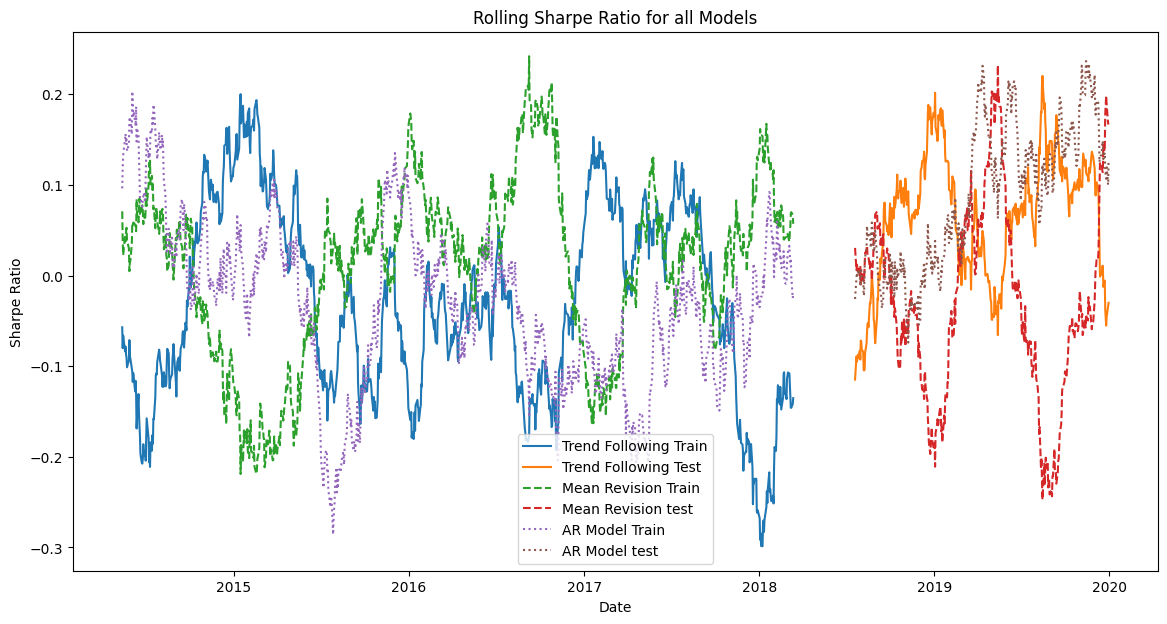

In [31]:
def plotRollingSharpeRatio(dataframe1,dataframe2,dataframe3,dataframe4,dataframe5,dataframe6):
    mean_excess_return1 = dataframe1['PnL'].rolling(window=90).mean()
    return_std1 = dataframe1['PnL'].rolling(window=90).std()
    rollingSharpeRation1 = mean_excess_return1 / return_std1
    
    mean_excess_return2 = dataframe2['PnL'].rolling(window=90).mean()
    return_std2 = dataframe2['PnL'].rolling(window=90).std()
    rollingSharpeRation2 = mean_excess_return2 / return_std2
    
    mean_excess_return3 = dataframe3['PnL'].rolling(window=90).mean()
    return_std3 = dataframe3['PnL'].rolling(window=90).std()
    rollingSharpeRation3 = mean_excess_return3 / return_std3
    
    mean_excess_return4 = dataframe4['PnL'].rolling(window=90).mean()
    return_std4 = dataframe4['PnL'].rolling(window=90).std()
    rollingSharpeRation4 = mean_excess_return4 / return_std4
    
    mean_excess_return5 = dataframe5['PnL'].rolling(window=90).mean()
    return_std5 = dataframe5['PnL'].rolling(window=90).std()
    rollingSharpeRation5 = mean_excess_return5 / return_std5
    
    mean_excess_return6 = dataframe6['PnL'].rolling(window=90).mean()
    return_std6 = dataframe6['PnL'].rolling(window=90).std()
    rollingSharpeRation6 = mean_excess_return6 / return_std6
    
    plt.figure(figsize=(14, 7))
    plt.plot(rollingSharpeRation1,label='Trend Following Train')
    plt.plot(rollingSharpeRation2,label='Trend Following Test')
    plt.plot(rollingSharpeRation3,label='Mean Revision Train',linestyle='--')
    plt.plot(rollingSharpeRation4,label='Mean Revision test',linestyle='--')
    plt.plot(rollingSharpeRation5,label='AR Model Train',linestyle=':')
    plt.plot(rollingSharpeRation6,label='AR Model test',linestyle=':')
    plt.title('Rolling Sharpe Ratio for all Models')
    plt.xlabel('Date')
    plt.ylabel('Sharpe Ratio')
    plt.legend()
    plt.show()

plotRollingSharpeRatio(Tracking1Train,Tracking1Test,Tracking2Train,Tracking2Test,Tracking3Train,Tracking3Test)
    

 3c Plot the Drawdown chart

In [32]:
def Drawdown(dataframe):
    # Calculate the Drawdown
    dataframe['Max_Cumulative_PnL'] = dataframe['PnL'].cummax()
    dataframe['Drawdown'] =  (dataframe['PnL']-dataframe['Max_Cumulative_PnL'])/dataframe['Max_Cumulative_PnL']
    # Calculate the Price return
    dataframe['PriceReturn'] = dataframe['Close'].pct_change()
    dataframe['Volatitlity90'] = dataframe['PriceReturn'].rolling(window=90).std() * np.sqrt(252) 
  

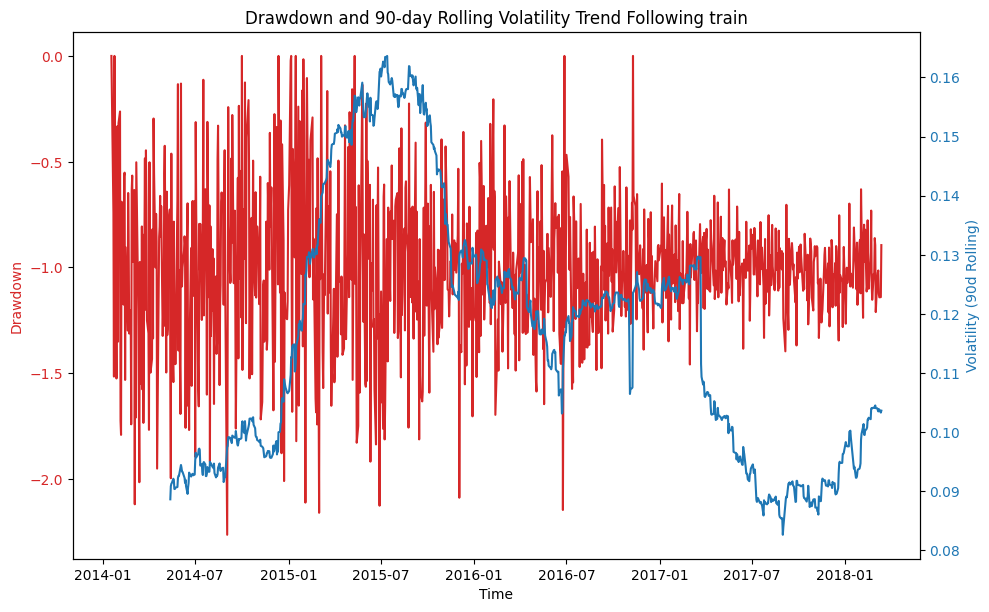

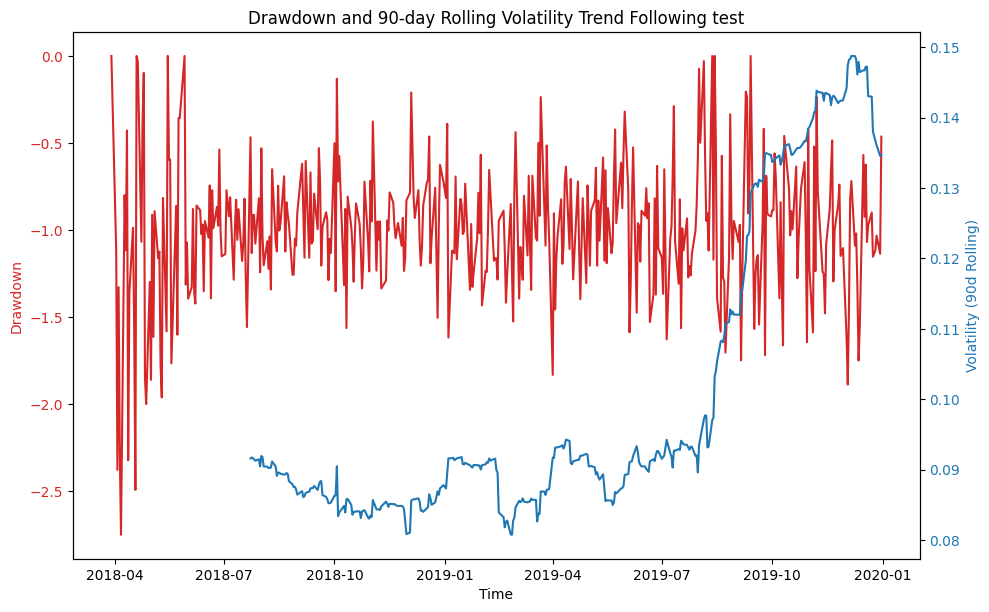

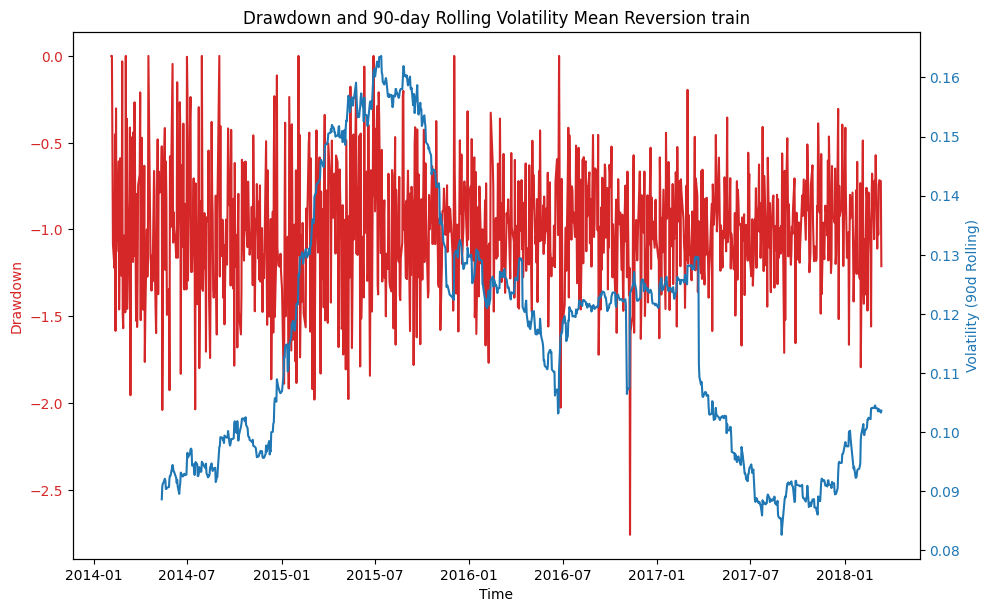

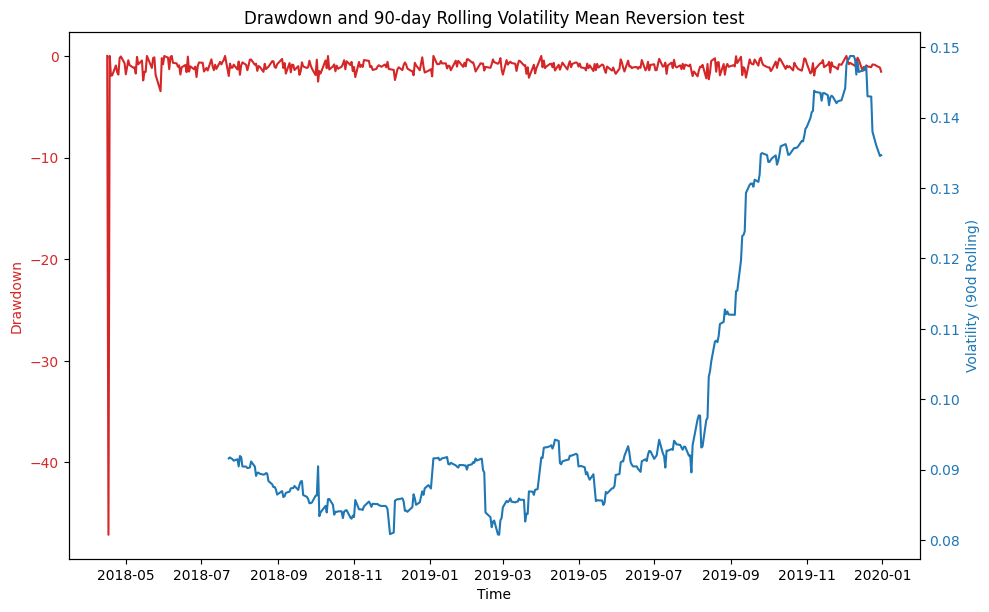

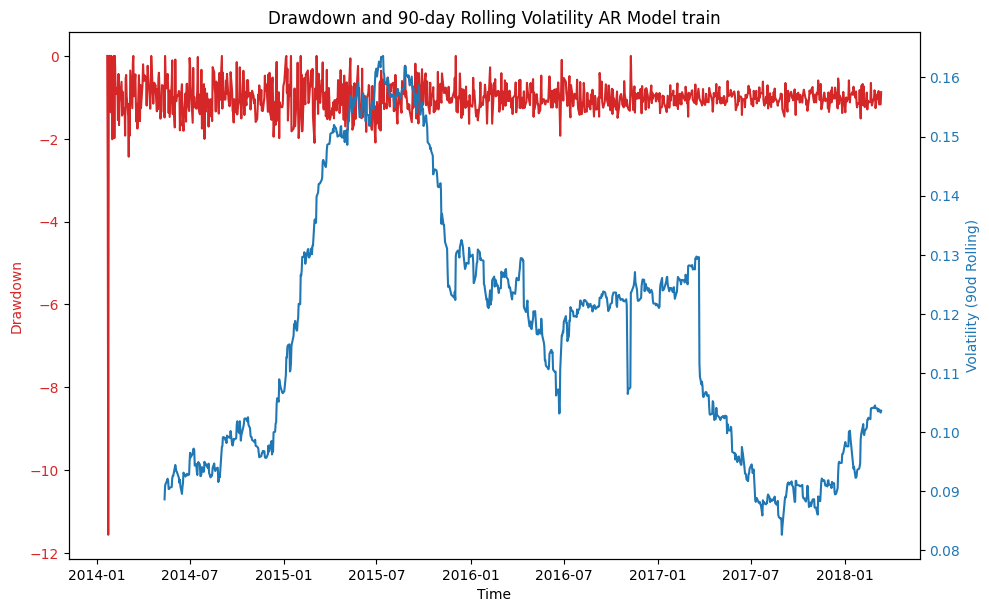

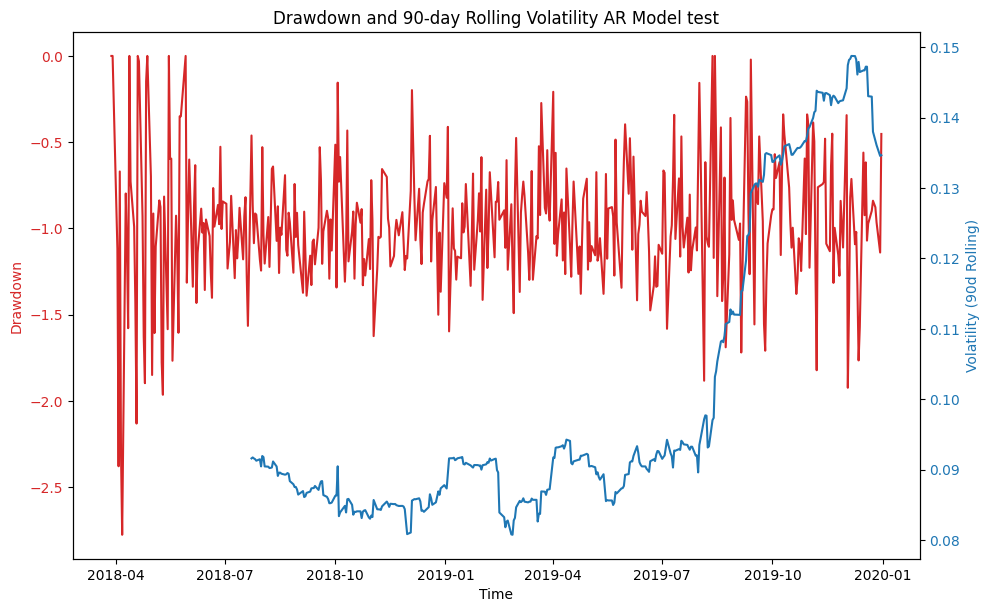

In [33]:
  
def PlotDrawdon(dataframe,title):
    # 绘制回撤图和90天滚动波动率
    fig, ax1 = plt.subplots(figsize=(10,6))

    color = 'tab:red'
    ax1.set_xlabel('Time')  
    ax1.set_ylabel('Drawdown', color=color)
    ax1.plot(dataframe['Drawdown'], color=color)
    ax1.tick_params(axis='y', labelcolor=color)

    ax2 = ax1.twinx()  # 实例化一个共享同一x轴的第二个y轴
    color = 'tab:blue'
    ax2.set_ylabel('Volatility (90d Rolling)', color=color)
    ax2.plot(dataframe['Volatitlity90'], color=color)
    ax2.tick_params(axis='y', labelcolor=color)

    fig.tight_layout()  # 调整布局
    plt.title(f'Drawdown and 90-day Rolling Volatility {title}')
    plt.show()
    
Drawdown(Tracking1Train)
Drawdown(Tracking1Test)
Drawdown(Tracking2Train)
Drawdown(Tracking2Test)
Drawdown(Tracking3Train)
Drawdown(Tracking3Test)

PlotDrawdon(Tracking1Train,'Trend Following train')
PlotDrawdon(Tracking1Test,'Trend Following test')
PlotDrawdon(Tracking2Train,'Mean Reversion train')
PlotDrawdon(Tracking2Test,'Mean Reversion test')
PlotDrawdon(Tracking3Train,'AR Model train')
PlotDrawdon(Tracking3Test,'AR Model test')


# test


In [34]:
# Performance  Indicator
# Sharpe Ratio
def ShapeRatio(dataframe):
    mean_excess_return = dataframe['PnL'].mean()
    return_std = dataframe['PnL'].std()
    return mean_excess_return / return_std

# Sortino Ratio
def SortinoRatio(dataframe):
    # Choose a negative excess return
    negative_excess_returns = dataframe['PnL'][dataframe['PnL'] < 0]
    # Calculate the standard deviation of negative excess return (downside risk)
    downside_std_dev = negative_excess_returns.std()
    # If the downside risk is 0 (avoid dividing by 0), you can choose to return a predefined value or NaN
    if downside_std_dev == 0:
        return float('NAN')  
    # Calculate the average value of excess return
    mean_excess_return = dataframe['PnL'].mean()
    sortino_ratio = mean_excess_return / downside_std_dev
    return sortino_ratio

# Maximum Drawdown
def MaximumDrawdown(dataframe):
    dataframe['PnLDailyRate'] = dataframe['PnL'].pct_change()
    dataframe['PnLDailyRate']=dataframe['PnLDailyRate'].replace([np.inf,-np.inf,np.nan],0)
    dataframe['Cumulative_Return'] = (1+dataframe['PnLDailyRate']).cumprod()
    peak = dataframe['Cumulative_Return'].expanding(min_periods=1).max()
    dataframe['Drawdown'] = (dataframe['Cumulative_Return'] - peak)/peak
    return dataframe['Drawdown'].min()

# Calmar Ratio
def CalmarRatio(dataframe,mdd):
    annual_return = dataframe['PnLDailyRate'].mean()
    return annual_return/abs(mdd)

def addIndicator(IndicatorDataframe:pd,testDataframe:pd,name:str):
    sharpe = ShapeRatio(testDataframe)
    sortino = SortinoRatio(testDataframe)
    mdd = MaximumDrawdown(testDataframe)
    calmar = CalmarRatio(testDataframe, mdd)
    IndicatorDataframe[name] = [sharpe,sortino,mdd,calmar]


In [35]:
PerformanceIndicator = pd.DataFrame(index=["Sharpe Ratio", "Sortino Ratio", "Maximum Drawdown", "Calmar Ratio"])

addIndicator(PerformanceIndicator,Tracking1Train,'Trend Following Train')
addIndicator(PerformanceIndicator,Tracking1Test,'Trend Following Test')
addIndicator(PerformanceIndicator,Tracking2Train,'Mean Reversion Train')
addIndicator(PerformanceIndicator,Tracking2Test,'Mean Reversion Test')
addIndicator(PerformanceIndicator,Tracking3Train,'AR Model Train')
addIndicator(PerformanceIndicator,Tracking3Test,'AR Model Test')

display(PerformanceIndicator)

Trend Following Train  Trend Following Test  \
Sharpe Ratio                  -0.027892              0.035429   
Sortino Ratio                 -0.044379              0.057569   
Maximum Drawdown              -2.264207             -2.753197   
Calmar Ratio                  -3.084376             -0.323850   

                  Mean Reversion Train  Mean Reversion Test  AR Model Train  \
Sharpe Ratio                  0.009872            -0.006129       -0.036374   
Sortino Ratio                 0.015314            -0.008670       -0.061416   
Maximum Drawdown             -2.618541            -3.614086       -2.588684   
Calmar Ratio                 -1.180124            -0.244333       -0.256472   

                  AR Model Test  
Sharpe Ratio           0.090431  
Sortino Ratio          0.156129  
Maximum Drawdown      -2.777556  
Calmar Ratio          -0.579171